In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def fib(n):
    a, b = 0, 1
    while b<n:
        print(b, end='')
        a, b = b, a+b
    print()

In [3]:
fib(15)


11235813


In [4]:
import fibo
fibo.fib(15)

1 1 2 3 5 8 13 


Le problème de Monty Hall

L'exposé du problème est plutôt simple. Imaginez un jeu télévisé où il y a trois portes sur le plateau de jeu. Seule une de ces portes cache un trésor. Il n'y a rien derrière les deux autres portes. Rien ne permet de savoir quelle porte cache le trésor.

La tâche du joueur consiste à choisir parmi les trois portes celle qu'il veut ouvrir. Il aura droit au trésor s'il choisit la bonne porte, et rien sinon. Pour faire son choix, il n'a aucune information. Il doit donc simplement s'en remettre au hasard.

Jusqu'ici, le problème n'a rien de remarquable. Mais il y a un twist ! Une fois que le joueur a fait son choix, mais avant d'ouvrir la porte, le présentateur élimine, parmi les deux portes non choisies, une porte qui ne contient pas de trésor. Si les deux portes restantes ne contiennent rien, le présentateur élimine simplement une d'entre elles au hasard.

Le joueur doit alors faire un nouveau choix. Il peut soit choisir d'ouvrir la première porte qu'il avait choisie, soit changer pour la porte non éliminée par le présentateur. La question est, qu'a-t-il intérêt à faire ? Réfléchissez-y. Vous n'avez en principe pas besoin de connaissances poussées en probabilités pour résoudre ce problème. Que feriez-vous ?

Simulation
Génération d'une seule partie de jeu
Allons-y. Nous allons commencer par écrire une fonction qui génère une partie du jeu. Cette fonction choisit aléatoirement une porte parmi les trois pour y cacher le trésor. Elle choisit ensuite aléatoirement le premier choix du participant, et élimine une des deux portes restantes. Ensuite, une nouvelle porte est choisie selon la stratégie adoptée par le joueur :

Changer de porte

Ne pas changer de porte

Enfin, le gain du participant est calculé.

Tout d’abord, préparons notre environnement de travail dans un notebook :

Simulation
Génération d'une seule partie de jeu
Allons-y. Nous allons commencer par écrire une fonction qui génère une partie du jeu. Cette fonction choisit aléatoirement une porte parmi les trois pour y cacher le trésor. Elle choisit ensuite aléatoirement le premier choix du participant, et élimine une des deux portes restantes. Ensuite, une nouvelle porte est choisie selon la stratégie adoptée par le joueur :

Changer de porte

Ne pas changer de porte

Enfin, le gain du participant est calculé.

Tout d’abord, préparons notre environnement de travail dans un notebook :

In [5]:
#https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/4740937-decouvrez-le-probleme-de-monty-hall#/id/r-4770946

# Pour afficher les graphiques dans la continuité du code, 
# et non pas dans une fenêtre à part:
%matplotlib inline

# Pour utiliser la fonction randint, qui génère des nombres
# entiers de façon aléatoire:
from random import randint, seed

# Un Enum est une structure de données qui consiste en un 
# ensemble d'éléments nommés. Une variable de ce type peut
# avoir comme valeur un de ces éléments.
from enum import Enum

# Pour pouvoir afficher des graphiques:
import matplotlib.pyplot as plt

Les strategies du joueur 
Maintenant nous allons définir les stratégies possibles pour le joueur. Il peut soit choisir de changer, soit de garder son choix initial. Pour cela, nous tirons profit de la classe  Enum  . Cette approche nous permet d'avoir des noms compréhensibles pour nos stratégies. Une autre approche consisterait à désigner chaque stratégie par un entier, par exemple 0 pour changer de porte, et 1 pour garder le choix initial. Mais cette approche a des défauts :

elle ne permet pas de contraindre le choix au moment où quelqu'un d'autre utilisera notre fonction. Un utilisateur final pourra appeler notre fonction de simulation en utilisant comme stratégie un entier non pris en charge, comme 2, et ne saura pas que cela posera problème à moins que nous implémentions des vérifications.

le code est moins lisible. Il faut se rappeler ce que chaque nombre signifie pour comprendre le programme.

In [6]:
# Ici nous définissons une sous-classe de Enum, qui contiendra 
# les stratégies possibles.
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2

Ce code fait appel à des notions de programmation orientée objet, notamment aux notions de classe et d'héritage. Vous ne devriez cependant pas avoir de mal à comprendre ce chapitre si vous ne maîtrisez pas ces concepts.

Enfin, nous pouvons définir notre fonction. Nous allons écrire une fonction très simple. Elle ne simule qu'une seule partie du jeu pour une stratégie donnée. Rappelez-vous comment on définit une fonction en Python.

Le commentaire en plusieurs lignes après la déclaration du nom de la fonction (lignes 6 à 18) est un docstring. Par convention, il est utilisé par plusieurs outils pour générer une documentation. C'est une très bonne idée de toujours commenter vos fonctions. Un bon commentaire doit expliquer non seulement ce que la fonction fait, mais aussi pourquoi.

Notez la séparation entre la première ligne du docstring, qui contient une description abrégée, et le reste, qui sert à décrire plus précisément la fonction. Dans la liste des arguments, on peut définir le type attendu entre parenthèses. Pour plus d'exemples d'utilisation des docstring, je vous invite à consulter cette page.

In [7]:
# Utilise l'horloge système pour initialiser le générateur de 
# nombres pseudo-aléatoires.
seed()

def play_game(strategie):
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle ne retourne que le résultat de la partie, parce 
    que nous n'aurons besoin que du résultat pour effectuer nos calculs.
    
    Args:
        strategie (Strategie): La stratégie du joueur
        
    Returns:
        bool: Le joueur a-t-il gagné?
    '''

    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choix du joueur
    premier_choix = randint(0,2)
    
    # Il nous reste deux portes
    portes.remove(premier_choix)
    
    # Le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    # Le deuxieme choix depend de la strategie
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    else:
        raise ValueError("Stratégie non reconnue!")
    
    return deuxieme_choix == bonne_porte

La fonction  randint  retourne un entier aléatoire compris entre ses deux arguments. Par exemple,  randint(0,2)  retournera 0, 1, ou 2. Chaque appel à la fonction entraînera la génération d'une nouvelle valeur. Il est donc important de sauvegarder la valeur de retour de la fonction dans une variable si on a besoin de la réutiliser par la suite.

randint, ainsi que d'autres fonctions de la librairie  random, utilisent en fait un générateur pseudo-aléatoire. Les détails de cette implémentation ne sont pas importants pour nous. Ce qu'il faut savoir, c'est que ces fonctions génèrent une suite de nombres aléatoires en se basant sur une valeur de base. Cette valeur de base peut être définie par l'utilisateur grâce à la fonction  seed. En utilisant cette fonction avec une valeur fixe, la même séquence sera générée d'une exécution du programme à l'autre. Si aucun argument n'est donné à  seed, l'horloge du système est utilisée pour avoir une valeur.

In [8]:
seed()
print("Premier nombre aléatoire: {}".format(randint(0,100)))
print("Deuxième nombre aléatoire: {}".format(randint(0,100)))

seed(1)
print("Premier nombre aléatoire: {}".format(randint(0,100)))
print("Deuxième nombre aléatoire: {}".format(randint(0,100)))

seed(1)
# Les deux prochains appels vont retourner le même résultat que les deux précédents
print("Premier nombre aléatoire: {}".format(randint(0,100)))
print("Deuxième nombre aléatoire: {}".format(randint(0,100)))

Premier nombre aléatoire: 51
Deuxième nombre aléatoire: 59
Premier nombre aléatoire: 17
Deuxième nombre aléatoire: 72
Premier nombre aléatoire: 17
Deuxième nombre aléatoire: 72


Simulation de plusieurs parties
Maintenant nous allons essayer notre fonction. N'hésitez pas à lancer la ligne suivante plusieurs fois pour vous convaincre que le résultat est aléatoire.

In [9]:
play_game(Strategie.CHANGER)

True

Bien ! Nous pouvons simuler une partie du jeu. Mais pour pouvoir nous convaincre de la réponse à l'énigme, nous avons besoin de jouer beaucoup de fois, noter les résultats, et ensuite en tirer des conclusions. Heureusement, nous avons un ordinateur sous la main.

Nous allons définir une fonction qui lancera le jeu autant de fois que nous le souhaitons, et retournera le résultat de chaque partie dans une  list. Pour pouvoir exécuter des calculs sur ces résultats, nous allons aussi les stocker non plus comme des variables booléennes (Vrai ou Faux) mais en terme du gain du joueur (1 s'il a gagné, 0 s'il a perdu).



In [10]:
def play(strategie, nb_tours):
    '''Simule une suite de tours du jeu.
    
    Cette fonction renvoie les résultats de plusieurs parties
    du jeu Monty Hall sous forme d'une liste de gains par le 
    joueur.
    
    Args:
        strategie (Strategie): La strategie du joueur
        nb_tours (int): Nombre de tours
        
    Returns:
        list: Liste des gains du joueurs à chaque partie
    '''
    
    # Ceci est une liste en compréhension. Pour en savoir plus, consulter 
    # le cours "Apprenez à programmer en Python" sur OpenClassrooms
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

La première chose à faire est de savoir, pour un nombre de parties donné (disons, 10000), quelle stratégie rapporte le plus au joueur. Nous avons une liste contenant autant de 1 que de nombre de parties gagnées par le joueur. Il nous suffit de calculer la somme de tous les éléments de cette liste, avec la fonction  sum, pour connaître le nombre de 1.



In [11]:
print("En changeant de porte, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.CHANGER, 10000))))
      
print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.GARDER, 10000))))


En changeant de porte, le joueur a gagné 6666 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3320 sur 10000 parties.


En changeant de porte, le joueur a gagné 6666 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3320 sur 10000 parties.
Le joueur qui a changé de porte a donc gagné approximativement deux fois plus souvent que le joueur qui a conservé son choix initial. Vous y attendiez-vous ? Et même après l'avoir simulé, n'avez-vous pas, comme moi, du mal à le croire ?

L'explication de ce résultat est finalement assez simple. Quand le joueur choisit une porte au début du jeu, il a une chance sur trois de tomber sur la porte qui cache le trésor. La probabilité que le trésor se cache derrière une des deux portes restantes est donc de 2/3.

L'élimination par le présentateur d'une des deux portes restantes ne change pas ces probabilités. Il élimine forcément une porte qui ne cache pas de trésor. La probabilité que la porte qu'il n'élimine pas contienne le trésor devient égale à 2/3.

Ce résultat est assez contre-intuitif. Mais nous venons de le montrer de façon empirique. Si vous voulez en savoir plus, n'hésitez pas à consulter l'article Wikipédia qui y est dédié.

Petit exercice
Nous pouvons imaginer une autre stratégie, où le joueur choisit aléatoirement une porte entre la première et celle que le présentateur n'a pas éliminée. Implémentez cette stratégie et observez les résultats. Vous devriez trouver que le gain attendu se situe à mi-chemin des gains attendus avec les deux stratégies initiales.

#


Ce chapitre contient quelques notions de probabilités. Vous pouvez cependant le comprendre sans maîtriser ce domaine. Pour avoir une première intuition de ce qu'est le théorème de la limite centrale en 6minutes, faites un petit tour sur cette vidéo ;).

Dans le chapitre précédent, nous nous sommes brièvement rappelé les bases de la programmation en Python, et nous nous sommes frottés à la visualisation des données avec Matplotlib. Dans ce chapitre, nous allons commencer à utiliser une autre librairie de la pile scientifique de Python, Numpy.

Numpy contient de nombreuses fonctions et structures de données orientées vers l'algèbre linéaire et l'analyse de données. Vous pouvez imaginer Numpy comme l'équivalent en Python du logiciel Matlab (sans les capacités graphiques, qui sont fournies par Matplotlib).

Pour cette première prise en main, nous allons nous attaquer à un théorème fondamental de la théorie des probabilités, le théorème de la limite centrale.

La distribution Gaussienne
Si à un moment de votre vie, vous vous êtes intéressés aux probabilités, vous avez certainement entendu parler de la distribution Gaussienne, que l'on peut représenter par sa densité :



https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/4740938-utilisez-numpy-pour-illustrer-le-theoreme-central-limite#/id/r-4772261

f(x|μ,σ2)=12πσ2−−−−√e−(x−μ)22σ2

où  μ représente la moyenne, et  σ l'écart type de la distribution. Pour une variable aléatoire, la densité a une définition simple.

La probabilité que la variable  x prenne une valeur entre  a et  b est donnée par l'intégrale de la densité de probabilité  de  x entre  a et b . En termes mathématiques :

P(x∈[a,b])=∫baf(x)dx
La forme de cette fonction est ... eh bien pourquoi ne pas utiliser Python pour la dessiner 

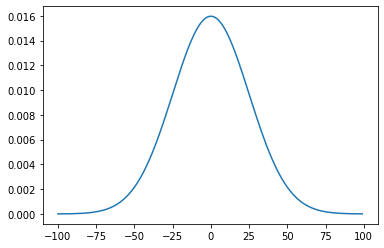

In [12]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, exp

domaine = range(-100,100)
mu = 0
sigma = 25

# Notez l'utilisation du mot clé lambda. Il est très bien expliqué dans le cours
# "Apprenez à programmer en Python" sur OpenClassrooms.
f = lambda x : 1/(sqrt(2*pi*pow(sigma,2))) * exp(-pow((x-mu),2)/(2*pow(sigma,2)))

y = [f(x) for x in domaine]
plot = plt.plot(domaine, y)


Et voilà la fameuse courbe en cloche. Remarquez qu'elle est centrée en 0 (parce que  μ=0). Cette fonction est intégrable entre  −∞ et  ∞. Mais la fonction vaut presque zéro (sans jamais être égale à 0) dès qu'on s'éloigne de son centre. La vitesse à laquelle  f tend vers 0 en s'éloignant de  μ est donnée par σ. Essayez de varier les paramètres  μ  et  σ  pour vous rendre compte de leur impact. Par exemple, observez la courbe avec μ=50, et tentez aussi σ=5. 

Le théorème central limite
Cette distribution est aussi couramment appelée la distribution normale. La raison de cette appellation est une propriété remarquable : beaucoup d'observations dans le monde réel semblent suivre cette loi. Par exemple, si on mesurait la taille de tous les humains sur terre et affichait l'histogramme de nos observations, nous obtiendrions une courbe très proche de celle que vous voyez au-dessus (avec une moyenne et un écart type différents, bien évidemment).

Cette propriété découle d'un théorème fondamental des probabilités, le théorème central limite. Intuitivement, ce théorème déclare que toute somme de variables aléatoires indépendantes et identiquement distribuées tend vers une variable aléatoire gaussienne. Nous allons dans ce chapitre illustrer ce théorème, sans tenter de le démontrer (ce n'est pas chose aisée).

Générez des réalisations de variables aléatoires avec Numpy
Pour commencer, nous allons générer des réalisations de variables aléatoires identiquement distribuées.

Ouf ! 6 mots de vocabulaire en une même phrase ! Pas d'inquiétude : ce n'est rien d'autre que ce que nous avons vu au chapitre précédent en utilisant les fonctions de la librairie random.

Dans ce chapitre, nous allons plutôt utiliser la librairie Numpy, qui rend cette tâche bien plus facile.



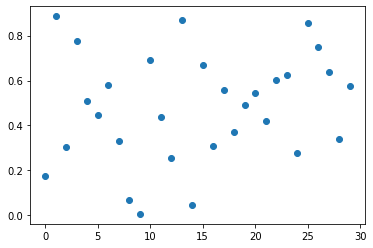

In [13]:
vecteur_aleatoire = np.random.rand(30)
plot = plt.scatter(range(30),vecteur_aleatoire)

Voilà. C'est pas bien difficile. Remarquez que ces variables sont uniformément distribuées, c'est-à-dire qu'elles ne semblent pas favoriser une valeur en particulier. Et si au lieu d'un vecteur, nous voulions une matrice?

Une matrice, c'est un tableau de nombres, avec des lignes et des colonnes.



[[0.1005036  0.4773649  0.81529353 0.05423671 0.19956718]
 [0.72676874 0.10530182 0.53353598 0.99679795 0.96181628]
 [0.25319717 0.17712247 0.58813466 0.10521962 0.75014373]]


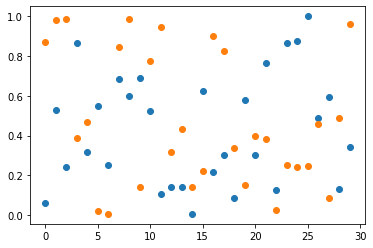

In [14]:
matrice_aleatoire_a_imprimer = np.random.rand(3,5)
print(matrice_aleatoire_a_imprimer)
matrice_aleatoire_a_grapher = np.random.rand(2,30)
fig = plt.figure()
plot1 = plt.scatter(range(30),matrice_aleatoire_a_grapher[0,:])
plot2 = plt.scatter(range(30),matrice_aleatoire_a_grapher[1,:])

 La fonction  rand  prend en argument la taille de la matrice que nous souhaitons générer. Pour accéder à une colonne ou une ligne dans cette matrice, il suffit d'utiliser la syntaxe  [], comme s'il s'agissait d'une liste. Le signe  :  demande à Numpy de nous donner toutes les colonnes, ce qui nous dispense d'écrire explicitement la taille de la matrice. Par exemple, pour une matrice de taille 2x3,  matrice[0:2][0:3]  et  matrice[:,:]  sont équivalents.

Les opérations de base sur les matrices Numpy
Intéressons-nous maintenant à notre problème. Nous voulons simuler un grand nombre de variables aléatoires. Donc nous devons générer, pour chaque variable aléatoire, un grand échantillon (c'est-à-dire un échantillon avec beaucoup d'individus).

Pour les notions de variable, d'individu et d'échantillon, suivez-moi par ici !

En prenant par exemple le cas où ces variables aléatoires sont uniformément distribuées dans l'intervalle [0,1], il nous suffit de générer une matrice avec la fonction  rand.

Uniformément distribuée dans [0, 1] signifie qu'aucune valeur entre 0 et 1 ne sera favorisée par rapport aux autres.

Considérons ici 100 variables aléatoires. On tire de chacune d'elles 1 échantillon de taille 200 (c'est-à-dire 200 individus). On se retrouve donc avec 100 échantillons de 200 individus chacun.



In [15]:
# Nous allons considérer 100 variables aléatoires, 
# chacune avec 200 échantillons.
matrice_aleatoire = np.random.rand(100,200)

sommes = np.sum(matrice_aleatoire,0)

Le deuxième argument de la fonction  sum  de Numpy dit à la fonction dans quel sens effectuer la somme. S'il vaut 0, la somme sera effectuée le long des lignes, et le résultat sera un vecteur avec autant d'éléments que de colonnes dans la matrice. S'il vaut 1, la somme sera effectuée le long des colonnes, et le résultat sera un vecteur avec autant d'éléments que de lignes dans la matrice. Si l'argument est absent, la fonction renverra simplement un nombre représentant la somme de tous les éléments dans la matrice. Nous pouvons inspecter la taille d'une variable de Numpy grâce à la propriété  shape.

In [16]:
print("La taille de la variable sommes est {}.".format(sommes.shape))

La taille de la variable sommes est (200,).


Remarquez que la taille est un peu étrange. C'est un  tuple  avec deux membres, mais le deuxième est vide, au lieu de valoir 1 (après tout nous avons une colonne de nombres). C'est une particularité des tableaux unidimensionnels de Numpy. Grâce à ceci, ce tableau peut être vu, en fonction des opérations, soit comme une ligne, soit comme une colonne. Pour certaines opérations d'algèbre linéaire, il sera nécessaire de convertir ces vecteurs soit en tableaux (1,n), soit en tableaux (n,1). Cette opération se fait grâce à la fonction  reshape.

En pratique, vous passerez certainement beaucoup de temps à vérifier les tailles des tableaux que vous manipulez grâce à leur propriété  shape. La raison en est simple. Pour les opérations d'algèbre linéaire, il y a souvent des contraintes sur la taille des matrices que vous serez amenés à manipuler. Si à un moment vous rencontrez un message d'erreur de la forme :  ValueError: shapes not aligned, pensez à vérifier les tailles de vos matrices.

Visualisation
Ça y est. Dans la variable  sommes  , nous avons un échantillon de taille 200, qui est la réalisation  d'une nouvelle variable aléatoire. Cette nouvelle variable aléatoire est la somme des 100 variables aléatoires identiquement distribuées que nous avions au départ. Si nous plaçons ces points sur un graphique, que va-t-on voir?



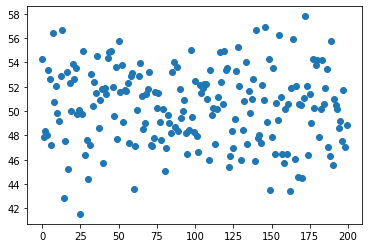

In [17]:
plot = plt.scatter(range(200), sommes)

Les points semblent se concentrer autour de la valeur 50. Mais il n'est pas évident dans ce graphique de bien comprendre leur comportement. Nous devons certainement changer d'outil de visualisation. Nous voulons voir la fréquence à laquelle chaque valeur est générée par notre variable aléatoire. Le bon outil est un ...

Les histogrammes
Un histogramme est très utile pour étudier une distribution. Et grâce à Matplotlib, nous pouvons en générer un facilement.



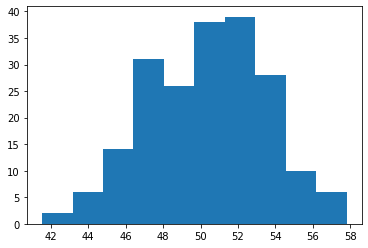

In [18]:
plot = plt.hist(sommes)

Nous commençons à deviner une courbe qui ressemble beaucoup à notre distribution favorite (la distribution gaussienne). Et si nous faisions la même chose avec beaucoup plus que 100 variables, et avec des échantillons beaucoup plus grands que 200 ? Attention, cela risque de prendre quelques secondes de calcul pour votre ordinateur !



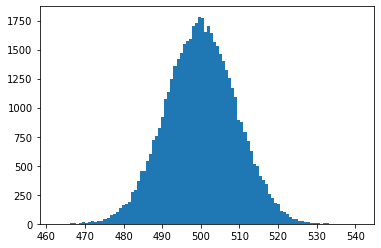

In [19]:
matrice_aleatoire = np.random.rand(1000,50000)
sommes = np.sum(matrice_aleatoire,0)
plot = plt.hist(sommes, bins=100)

C'est beaucoup mieux ! Remarquez l'argument  bins  de la fonction  hist. Il dicte à la fonction dans combien de classes répartir les valeurs. C'est essentiel quand nous avons affaire à des données sous forme de nombres réels.

Pour une variable aléatoire X continue (par exemple si X prend des valeurs réelles), la probabilité P(X=x)=0,∀x∈R . Pour pouvoir raisonner sur ces variables, nous considérons les intervalles de valeurs, c'est à dire P(X∈[a,b]) . Pour savoir combien d'intervalles créer, nous utilisons l'argument  bins.

Calculer les propriétés d'un échantillon
Nous aimerions connaître de façon empirique les propriétés de la distribution que nous avons générée. Et heureusement, nous avons Numpy.

In [20]:
print("La moyenne empirique de notre distribution est {}."
      .format(np.mean(sommes)))
print("La moyenne empirique de la variable généré par la fonction rand est {}."
      .format(np.mean(np.random.rand(100000))))
print("La variance empirique de notre distribution est {}."
      .format(np.var(sommes)))
print("La variance empirique de la variable généré par la fonction rand est {}."
      .format(np.var(np.random.rand(100000))))

La moyenne empirique de notre distribution est 500.0406020523122.
La moyenne empirique de la variable généré par la fonction rand est 0.4988360992195212.
La variance empirique de notre distribution est 82.81991431561423.
La variance empirique de la variable généré par la fonction rand est 0.08363745721270206.


La moyenne de notre distribution est égale à la somme des moyennes des distributions qui la composent. La variance est la somme des variances des distributions qui composent notre distribution. Attention, ces propriétés ne sont valables que parce que nos distributions sont indépendantes.




Entraînez-vous en simulant le problème de Monty Hall avec Numpy
À vous de jouer !
Pour vous entraîner, réalisez cet exercice étape par étape. Une fois terminé, vous pouvez comparer votre travail avec les pistes que je vous propose.

Contexte
Pour cet exercice, je vous demande simplement de refaire ce que nous avons fait dans le chapitre sur le problème de Monty Hall, mais en utilisant cette fois Numpy.  Vous allez donc simuler le problème de Monty Hall, et visualiser les résultats de vos simulations. Vous devrez assembler les deux fonctions  play_game  et  play  au sein d'une même fonction. Cette fonction devra générer un tableau Numpy des gains du joueur, et non pas une  list. 

Vous ne devrez pas faire appel à la librairie  random  de Python (mais vous utiliserez la librairie  random de Numpy). 

Votre code ne doit pas comporter de boucle (pas de  for) dans la partie calculatoire. Pour cela, vous devrez sûrement vous creuser un peu la tête. N'oubliez pas que Numpy peut très rapidement comparer les éléments de deux tableaux un à un. 

Vous devrez intégrer cette fonction dans un module Python. Votre notebook ne doit comporter aucune définition de fonction.

Votre notebook doit s'exécuter et générer les mêmes graphiques que ceux du cours.

Consigne
Un fichier .py doit accompagner le notebook, avec à l'intérieur la définition d'une fonction.

Le notebook doit utiliser la fonction du module pour simuler le jeu.

La fonction ou le notebook ne doivent pas importer le module random (mais numpy.random), ou tout au moins ne pas l'utiliser.

Les graphiques du chapitre doivent être reproduits (attention, nous faisons appels à des variables aléatoires, donc les graphiques ne seront pas forcément identiques).

Le notebook doit être bien segmenté (tout le code ne doit pas être dans une seule cellule).

Toutes les cellules doivent s'exécuter sans erreur (il faut les exécuter dans l'ordre !).

Vérifiez votre travail
Alors, vous êtes allé au bout ? Suivez le guide pour vérifier votre travail !

Voici un exemple pour vous permettre de vérifier votre travail !

Dans ce chapitre, nous allons voir des techniques pour charger, stocker et manipuler efficacement les données. Elles peuvent venir de sources très variées, mais nous pouvons toujours les considérer comme des tableaux de nombres. Par exemple, une image peut être considérée comme un tableau de deux dimensions (une matrice) où chaque nombre représente l'intensité lumineuse d'un pixel. Pour cette raison, il est fondamental de pouvoir manipuler efficacement ces tableaux. Dans ce chapitre, nous allons voir un outil pour manipuler ces tableaux : Numpy.

NumPy (diminutif de Numerical Python) fournit une interface pour stocker et effectuer des opérations sur les données. D'une certaine manière, les tableaux Numpy sont comme les listes en Python, mais Numpy permet de rendre les opérations beaucoup plus efficaces, surtout sur les tableaux de large taille. Les tableaux Numpy sont au cœur de presque tout l'écosystème de data science en Python.

Commençons par importer Numpy.



In [21]:
import numpy as np

Créez des tableaux Numpy
Contrairement aux listes en Python, les tableaux Numpy ne peuvent contenir des membres que d'un seul type. Ce type est automatiquement déduit au moment de la création du tableau, et a un impact sur les opérations qui y seront appliquées. On peut aussi spécifier le type manuellement. Nous allons voir des exemples pour les deux cas tout de suite. On peut créer des tableaux de différentes façons dans Numpy.

Depuis une liste Python

In [22]:
# Tableau d'entiers:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

Nous pouvons aussi manuellement spécifier un type :



In [23]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

Contrairement aux listes Python, les tableaux Numpy peuvent être explicitement multi-dimensionnels. C'est-à-dire que le tableau multi-dimensionnel (par exemple un tableau de nombres avec des lignes et des colonnes) est reconnu par NumPy. Mais en Python natif, on représente un tableau multidimensionnel par une liste de listes, car au final, un tableau à 2 entrées (lignes et colonnes), ce n'est rien d'autre qu'une liste de lignes, et une ligne est une liste de nombres !



In [24]:
# Une liste de listes est transformée en un tableau multi-dimensionnel
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

Nous avons utilisé une compréhension de liste pour générer la liste qui sert à créer le tableau Numpy. Rappelez-vous de la syntaxe  [f(x) for x in another_list]  qui crée une liste en appliquant la fonction  f  à chaque membre de  another_list.

Créer les tableaux directement
Il est souvent plus efficace, surtout pour les tableaux larges, de les créer directement. Numpy contient plusieurs fonctions pour cette tâche.



In [25]:
# Un tableau de longueur 10, rempli d'entiers qui valent 0
np.zeros(10, dtype=int)



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
# Un tableau de taille 3x5 rempli de nombres à virgule flottante de valeur 1
np.ones((3, 5), dtype=float)



array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [27]:
# Un tableau 3x5 rempli de 3,14
np.full((3, 5), 3.14)



array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [28]:
# Un tableau rempli d'une séquence linéaire
# commençant à 0 et qui se termine à 20, avec un pas de 2
np.arange(0, 20, 2)



array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [29]:
# Un tableau de 5 valeurs, espacées uniformément entre 0 et 1
np.linspace(0, 1, 5)



array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [30]:
# Celle-ci vous la conaissez déjà! Essayez aussi "randint" et "normal"
np.random.random((3, 3))



array([[0.10434882, 0.5235651 , 0.89264385],
       [0.41365701, 0.41051131, 0.54003799],
       [0.26008448, 0.29837323, 0.69497123]])

In [31]:
# La matrice identité de taille 3x3 
# (matrice identité : https://fr.wikipedia.org/wiki/Matrice_identit%C3%A9)
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Les propriétés des tableaux
Chaque tableau Numpy a des propriétés qui se révèlent souvent utiles.



In [32]:
np.random.seed(0)
x1 = np.random.randint(10, size=6)  # Tableau de dimension 1
print("nombre de dimensions de x1: ", x1.ndim)
print("forme de x1: ", x1.shape)
print("taille de x1: ", x1.size)
print("type de x1: ", x1.dtype)

nombre de dimensions de x1:  1
forme de x1:  (6,)
taille de x1:  6
type de x1:  int32


Indexation et Slicing
Nous aurons souvent besoin d'accéder à un ou plusieurs éléments contigus d'un tableau. Heureusement, avec Numpy, c'est chose aisée.

Accéder à un seul élément

In [33]:
print(x1)



[5 0 3 3 7 9]


In [34]:
# Pour accéder au premier élément
print(x1[0])



5


In [35]:
# Pour accéder au dernier élément
print(x1[-1])



9


In [36]:
x2 = np.random.randint(10, size=(3, 4))  # Tableau de dimension 2
print(x2[0,1])



5


In [37]:
# On peut aussi modifier les valeurs
x1[1] = "1000"
print(x1)



[   5 1000    3    3    7    9]


In [38]:
# Attention au type
x1[1] = 3.14
print(x1)

[5 3 3 3 7 9]


Accéder à plusieurs éléments
De la même façon que nous pouvons indexer des éléments grâce à  [], nous pouvons accéder à un ensemble d'éléments en combinant  []  et  :. La syntaxe suit une règle simple :  x[début:fin:pas].

Le début peut être omis si on veut commencer au début de la liste (c'est à dire si début = 0). La fin peut être omise si on veut aller jusqu'au bout de la liste (c'est à dire fin = -1 ou fin = len(liste) ). Le pas, ainsi que le dernier  :, peuvent être omis si le pas est de 1 (-1 si la fin est inférieure au début). 



In [39]:
print(x1[:5])  # Les cinq premiers éléments



[5 3 3 3 7]


In [40]:
print(x1[5:])  # Les éléments à partir de l'index 5



[9]


In [41]:
print(x1[::2])  # Un élément sur deux

[5 3 7]


Si le pas est négatif, le début et la fin du slice sont inversés. On peut utiliser cette propriété pour inverser un tableau.



In [42]:
x1[::-1]

array([9, 7, 3, 3, 3, 5])

On peut accéder de la même façon aux éléments d'un tableau multi-dimensionnel. Par exemple, on a souvent besoin d'accéder à une ligne ou une colonne d'une matrice.



In [43]:
print(x2)



[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


In [44]:
x2[0,:] # La première ligne

array([3, 5, 2, 4])

Si les tableaux sont de dimension > 1, on peut utiliser soit  vstack  (vertical) ou  hstack.



In [45]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

Opérations sur les tableaux Numpy
Jusqu'à maintenant dans ce chapitre, nous avons vu des choses très basiques sur les tableaux Numpy. A partir d'ici, nous allons voir ce qui rend Numpy vraiment indispensable.

Les boucles peuvent êtres lentes en Python
L'implémentation de référence de Python, encore appelée CPython, est très flexible, mais cette flexibilité l'empêche d'utiliser toutes les optimisations possibles. Par exemple, observez le temps d'exécution de ce morceau de code

In [46]:
def calcul_inverse(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
print(calcul_inverse(values))

tableau_large = np.random.randint(1, 100, size=1000000)

# Ceci est une facilité des notebooks jupyter pour 
# mesurer le temps d'exécution d'une instruction
%timeit calcul_inverse(tableau_large)

[0.11111111 0.5        0.16666667 0.11111111 0.2       ]
6.91 s ± 27.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Il faut plusieurs secondes pour accomplir un million d'opérations. Sachant que les processeurs actuels sont capables d'exécuter des milliards d'opérations par seconde, cette durée peut apparaître absurde. Ce délai est dû à toutes les opérations annexes que doit accomplir l'interprète, comme les appels de fonction et vérifications de type.

Dans beaucoup de cas, Numpy fournit une interface pour ces opérations qui n'implique que des données du même type. Cette interface utilise une implémentation en langage C, qui peut faire appel à toutes les fonctionnalités des processeurs modernes. Par exemple, on peut calculer les inverses de tous les éléments d'un tableau Numpy comme ceci.



In [47]:
%timeit (1.0 / tableau_large)

10.8 ms ± 46.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


À chaque fois que vous vous trouvez en train d'utiliser une boucle pour effectuer une opération en Python, demandez-vous si cette opération ne peut pas s'accomplir grâce à Numpy sans boucle.

Nous allons maintenant faire un tour d'horizon de ces opérations.

Les fonctions universelles


In [48]:
# Il y a tout d'abord des opération mathématiques simples
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # Division avec arronid

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


Vous pouvez aussi appeler des fonctions sur les tableaux Numpy, et même sur les listes Python.



In [49]:
x = [-2, -1, 1, 2]
print("La valeur absolue: ", np.abs(x))
print("Exponentielle: ", np.exp(x))
print("Logarithme: ", np.log(np.abs(x)))

La valeur absolue:  [2 1 1 2]
Exponentielle:  [0.13533528 0.36787944 2.71828183 7.3890561 ]
Logarithme:  [0.69314718 0.         0.         0.69314718]


Il y a plein d'autres fonctions, que je vous invite à découvrir dans la documentation de Numpy. La leçon à retenir ici est simple : évitez tant que possible les boucles.

Opérations Booléennes
Vous pouvez aussi exécuter des opérations booléennes sur vos tableaux. En clair, vous pouvez demander si une certaine condition est vraie pour chaque élément d'un tableau. Par exemple :



In [50]:
x = np.random.rand(3,3)
x > 0.5

array([[ True,  True, False],
       [ True,  True,  True],
       [False,  True, False]])

Vous pouvez coupler cette capacité avec la fonction  np.where, pour retourner parmi tous les éléments d'un tableau les index de ceux qui vérifient une certaine propriété :



In [51]:
np.where(x > 0.5)

(array([0, 0, 1, 1, 1, 2], dtype=int32),
 array([0, 1, 0, 1, 2, 1], dtype=int32))

Agrégation
Très souvent, face à de larges quantités de données, la première chose à faire est de calculer des statistiques sur nos données, comme la moyenne ou l'écart type. Numpy a des fonctions pour calculer ces données sur ses tableaux.



In [52]:
L = np.random.random(100)
L
np.sum(L)

49.09899667867994

Cette fonction existe aussi en Python, mais la version Numpy est beaucoup plus rapide. De même, Numpy a des équivalents pour  min  et  max. Faites cependant attention aux arguments optionnels de chaque version de ces fonctions. Gardez aussi à l'esprit que seule la version Numpy gère correctement les tableaux multidimensionnels.



In [53]:
%timeit sum(tableau_large)


458 ms ± 17.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [54]:
%timeit np.sum(tableau_large)

677 µs ± 4.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Les fonctions d'agrégation peuvent optionnellement ne s'appliquer qu'à une dimension d'un tableau multidimensionnel. Par exemple, nous pouvons avoir besoin de la somme des éléments de chaque colonne d'une matrice (nous avons vu un cas d'utilisation dans le chapitre 3 de la première partie de ce cours). Pour cela nous utilisons l'argument optionnel  axis.



In [55]:
M = np.random.random((3, 4))
print(M)
# Notez la syntax variable.fonction au lieu de 
# np.fonction(variable). Les deux sont possibles si
# la variable est un tableau Numpy.
print("La somme de tous les éléments de M: ", M.sum())
print("Les sommes des colonnes de M: ", M.sum(axis=0))

[[0.81001412 0.08782143 0.15618846 0.73099033]
 [0.6427996  0.09425156 0.1035502  0.32354189]
 [0.3706353  0.87966194 0.44429964 0.67253984]]
La somme de tous les éléments de M:  5.316294300734639
Les sommes des colonnes de M:  [1.82344903 1.06173492 0.7040383  1.72707205]


Parmi les nombreuses fonctions disponibles, notons :
-  np.std  pour calculer l'écart type
-  np.argmin  pour trouver l'index de l'élément minimum
-  np.percentile  pour calculer des statistiques sur les éléments.

Broadcasting
Le broadcasting désigne un ensemble de règles pour appliquer une opération qui normalement ne s'applique que sur une seule valeur à l'ensemble des membres d'un tableau Numpy. Par exemple, pour les tableaux de même taille, les opérations comme l'addition s'appliquent normalement élément par élément.


In [56]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Le broadcasting nous permet d'appliquer ces opérations sur des tableaux de dimensions différentes. Par exemple :



In [57]:
a + 5

array([5, 6, 7])

C'est comme si Numpy avait converti la valeur 5 en un tableau de taille 3, et ensuite avait additionné ce tableau à celui contenu dans a. Ce n'est qu'une vue d'esprit faite pour comprendre ce qui se passe. Numpy se passe de toutes ces opérations annexes, ce qui rend le tout plus rapide.

Cela marche aussi quand les deux arguments sont des tableaux :



In [58]:
M = np.ones((3, 3))
print("M vaut: \n", M)
print("M+a vaut: \n", M+a)

M vaut: 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
M+a vaut: 
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


N'hésitez pas à vous essayer à ces opérations avec des tableaux de dimensions et tailles différentes pour bien prendre en main cet outil. Un dernier exemple cependant : que pensez-vous sera le résultat de l'opération suivante ?



In [59]:
a = np.arange(3)
# La ligne suivante crée une matrice de taille 3x1
# avec trois lignes et une colonne.
b = np.arange(3)[:, np.newaxis]
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Pour aller plus loin
La librairie Numpy est très avancée et contient énormément de fonctions et de mécanismes. N'hésitez pas à aller sur le site officiel pour vous renseigner un peu plus sur ces fonctions et des choses que nous n'avons pas évoquées ici, comme les  mask, qui permettent d'accéder à un sous-ensemble des tableaux Numpy composé d'éléments qui vérifient une certaine propriété (par exemple tous les éléments positifs)

Matplotlib a vu le jour pour permettre de générer directement des graphiques à partir de Python. Au fil des années, Matplotlib est devenu une librairie puissante, compatible avec beaucoup de plateformes, et capable de générer des graphiques dans beaucoup de formats différents.

Dans ce chapitre, nous allons nous concentrer sur l'utilisation de Matplotlib comme outil de visualisation dans les notebooks Jupyter.

Pour commencer, mettons en place l'environnement de travai

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

Réaliser des graphiques simples
Commençons par étudier un cas simple, comme tracer la courbe d'une fonction. Nous avons vu un exemple de cette utilisation dans le chapitre 3 de la première partie de ce cours. Ici, nous allons le faire d'une manière moins simple, mais qui nous donne plus de possibilités.



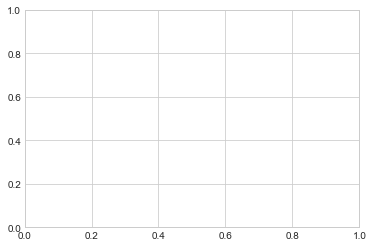

In [61]:
fig = plt.figure()
ax = plt.axes()

La variable  fig  correspond à un conteneur qui contient tous les objets (axes, labels, données, etc). Les axes correspondent au carré que l'on voit au-dessus, et qui contiendra par la suite les données du graphe.



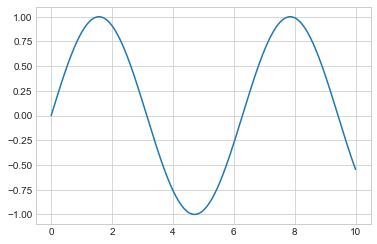

In [62]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

On aurait pu simplement taper 

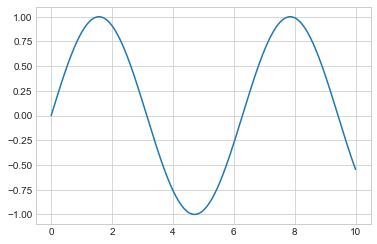

In [63]:
 plt.plot(x, np.sin(x))



Maintenant, voyons un exemple un peu plus poussé. Pour cet exemple, je vous invite à lire le code et les commentaires, et à observer le résultat sur le graphique généré.

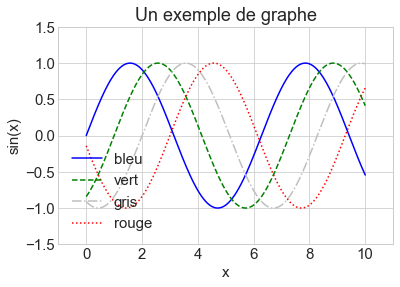

In [64]:
# Chanegr la taille de police par défaut
plt.rcParams.update({'font.size': 15})

fig = plt.figure()
ax = plt.axes()
# Couleur spécifiée par son nom, ligne solide
plt.plot(x, np.sin(x - 0), color='blue', linestyle='solid', label='bleu')
# Nom court pour la couleur, ligne avec des traits
plt.plot(x, np.sin(x - 1), color='g', linestyle='dashed', label='vert')
# Valeur de gris entre 0 et 1, des traits et des points
plt.plot(x, np.sin(x - 2), color='0.75', linestyle='dashdot', label='gris')
# Couleur spécifié en RGB, avec des points
plt.plot(x, np.sin(x - 3), color='#FF0000', linestyle='dotted', label='rouge')

# Les limites des axes, essayez aussi les arguments 'tight' et 'equal' 
# pour voir leur effet
plt.axis([-1, 11, -1.5, 1.5]);

# Les labels
plt.title("Un exemple de graphe")

# La légende est générée à partir de l'argument label de la fonctio
# plot. L'argument loc spécifie le placement de la légende
plt.legend(loc='lower left');

# Titres des axes
ax = ax.set(xlabel='x', ylabel='sin(x)')

Visualiser l'incertitude
Dans la vie réelle, les données que nous sommes amenés à analyser sont souvent bruitées, c'est-à-dire qu'il existe une part d'incertitude sur leur valeur réelle. Il est extrêmement important d'en tenir compte non seulement lors de l'analyse des données, mais aussi quand on veut les présenter.

Données discrètes
Dans le cas de données discrètes (des points), nous utilisons souvent les barres d'erreur pour représenter, pour chaque point, l'incertitude quant à sa valeur exacte. Souvent la longueur des barres correspond à l'écart type des observations empiriques. C'est chose aisée avec Matplotlib.



<ErrorbarContainer object of 3 artists>

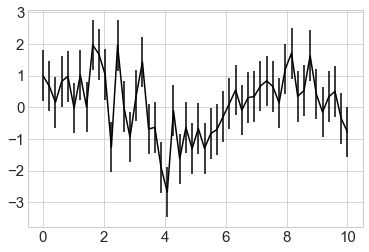

In [65]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='k')

Errorbar  prend en argument les abscisses  x, les coordonnées  y et les longueurs de chaque barre (une barre par point)  yerr.  Notez l'argument  fmt. Il permet de choisir, de façon courte, la couleur (ici noir ou black) et la forme des marqueurs du graphe.  Errorbar  permet aussi de personnaliser encore plus l'apparence du graphe. Je vous invite fortement à consulter sa documentation

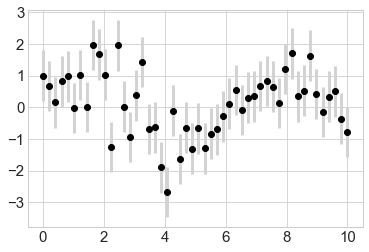

In [66]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

Données continues
Parfois, comme quand on essaie d'appliquer la régression par processus gaussien, nous avons besoin de représenter une incertitude sur une fonction continue. On peut faire ceci en utilisant la fonction  plot  conjointement avec la fonction  fill_between. Mais nous allons voir plus tard dans ce chapitre comment le faire plus simplement avec la librairie Seaborn.

Personnalisation et sous-graphes
Matplotlib est très flexible. Quasiment tous les aspects d'une figure peuvent être configurés par l'utilisateur soit pour y ajouter des données, soit pour améliorer l'aspect esthétique. Plutôt que de vous faire une liste des fonctions qui permettent de faire ces actions, j'ai plutôt décidé de vous montrer des exemples. A l'avenir, n'hésitez pas à revenir vers cette partie pour vous remémorer comment réaliser une opération spécifique

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast']


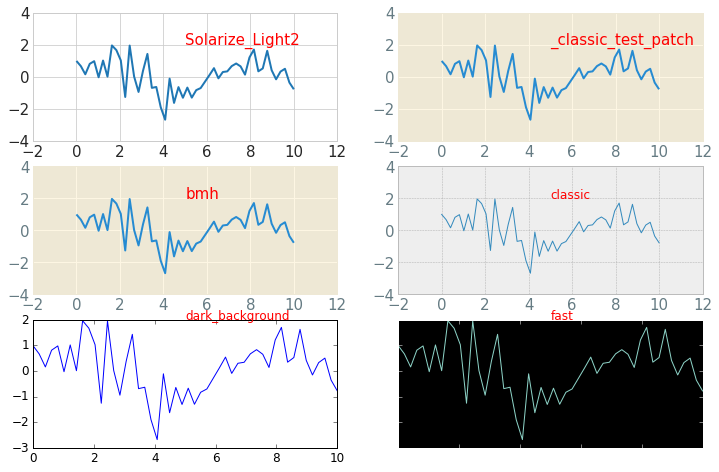

In [67]:
print(plt.style.available[:6])

# Notez la taille de la figure
fig = plt.figure(figsize=(12,8))
for i in range(6):
    # On peut ajouter des sous graphes ainsi
    fig.add_subplot(3,2,i+1)
    plt.style.use(plt.style.available[i])
    plt.plot(x, y)
    
    # Pour ajouter du texte
    plt.text(s=plt.style.available[i], x=5, y=2, color='red')

Le premier argument de la fonction add_subplot est le nombre de lignes de notre tableau de graphes (ici 3). Le deuxième est le nombre de colonnes (ici 2). Le troisième est le numéro du graphe, parmi les graphes de ce tableau, que nous voulons dessiner.

Pour des raisons historiques, les sous-graphes sont numérotés à partir de 1, au lieu de 0. Le graphe tout en haut à gauche est donc le graphe numéro 1.

Nous pouvons aussi tout personnaliser à la main.

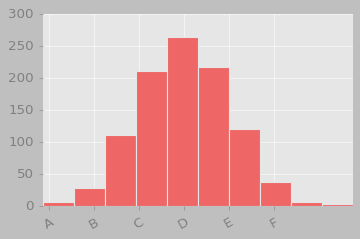

In [68]:
# On peut aussi tout personnaliser à la main
x = np.random.randn(1000)

plt.style.use('classic')
fig=plt.figure(figsize=(5,3))
ax = plt.axes(facecolor='#E6E6E6')

# Afficher les ticks en dessous de l'axe
ax.set_axisbelow(True)

# Cadre en blanc
plt.grid(color='w', linestyle='solid')

# Cacher le cadre
# ax.spines contient les lignes qui entourent la zone où les 
# données sont affichées.
for spine in ax.spines.values():
    spine.set_visible(False)
    
# Cacher les marqueurs en haut et à droite
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Nous pouvons personnaliser les étiquettes des marqueurs
# et leur appliquer une rotation
marqueurs = [-3, -2, -1, 0, 1, 2]
xtick_labels = ['A', 'B', 'C', 'D', 'E', 'F']
plt.xticks(marqueurs, xtick_labels, rotation=30)

# Changer les couleur des marqueurs
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# Changer les couleur des barres
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

Seaborn est une librairie qui vient s'ajouter à Matplotlib, remplace certains réglages par défaut et fonctions, et lui ajoute de nouvelles fonctionnalités. Seaborn vient corriger trois défauts de Matplotlib:

Matplotlib, surtout dans les versions avant la 2.0, ne génère pas des graphiques d'une grande qualité esthétique.

Matplotlib ne possède pas de fonctions permettant de créer facilement des analyses statistiques sophistiquées.

Les fonctions de Matplotlib ne sont pas faites pour interagir avec les Dataframes de Panda (que nous verrons au chapitre suivant).

Seaborn fournit une interface qui permet de palier ces problèmes. Il utilise toujours Matplotlib "sous le capot", mais le fait en exposant des fonctions plus intuitives. Pour commencer à l'utiliser, rien de plus simple.



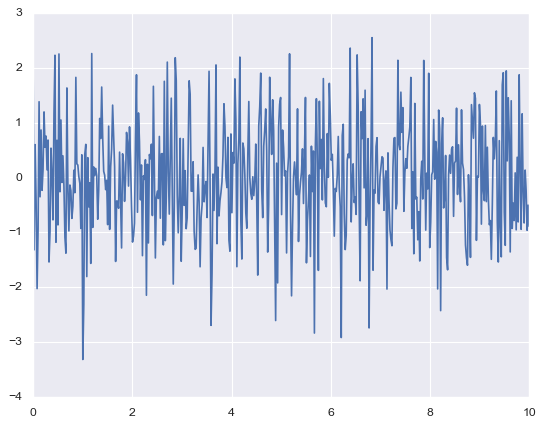

In [69]:
import seaborn as sns
sns.set()

x = np.linspace(0, 10, 500)
y = np.random.randn(500)
plt.plot(x,y)


Qu'en pensez-vous ? Trouvez-vous celui-ci plus agréable à l'œil ?

Seaborn nous fournit aussi des fonctions pour des graphiques utiles pour l'analyse statistique. Par exemple, la fonctiondistplot  permet non seulement de visualiser l'histogramme d'un échantillon, mais aussi d'estimer la distribution dont l'échantillon est issu.

c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


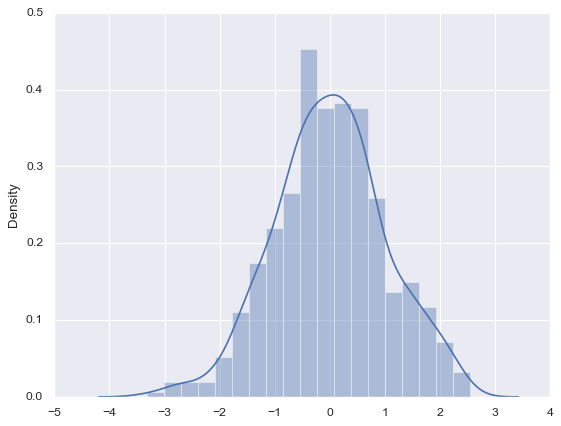

In [70]:
sns.distplot(y, kde=True);

Imaginons que nous voulons travailler sur un ensemble de données provenant du jeu de données "Iris", qui contient des mesures de la longueur et la largeur des sépales et des pétales de trois espèces d'iris. C'est un jeu de données très souvent utilisé pour se faire la main sur des problèmes de machine learning.


In [71]:

iris = sns.load_dataset("iris")
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Pour voir les relations entre ces caractéristiques, on peut faire des graphiques par paire :


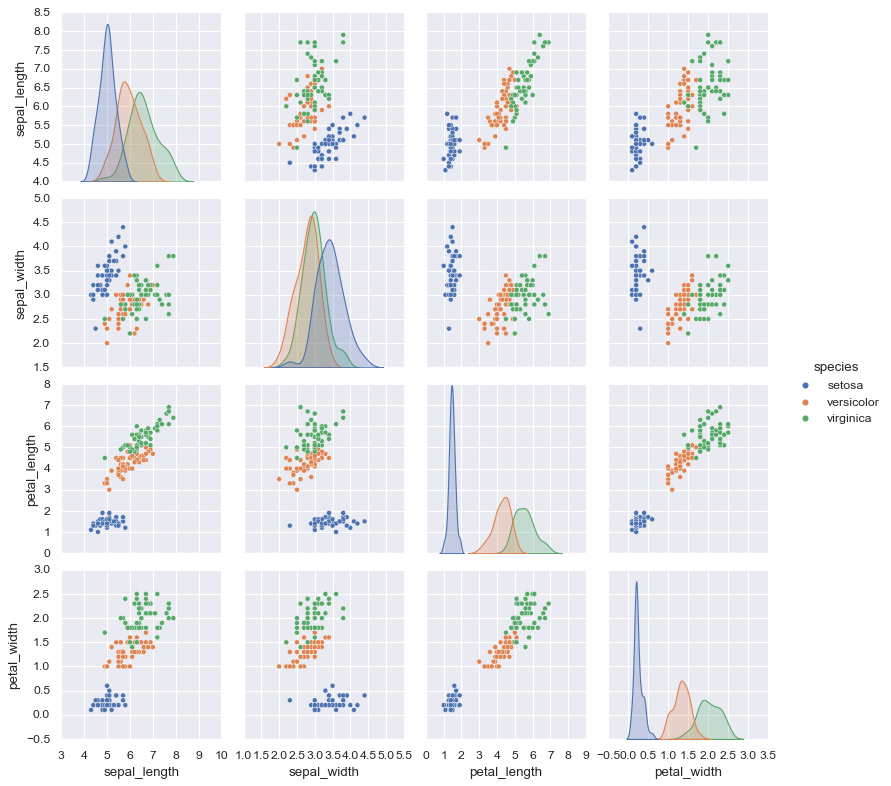

In [72]:

sns.pairplot(iris, hue='species', height=2.5);

Prenez le temps d'étudier ce graphique.

Pourquoi les graphes sur la diagonale sont-ils des histogrammes ? Que pouvez-vous dire des relations entre les différentes caractéristiques ? Et sur les différences entre les espèces ?

La diagonale est traitée différemment, car tracer une variable en fonction d'elle-même n'aurait aucun intérêt. À la place,  sns.pairplot  trace un histogramme des données en fonction de la variable en question pour chaque classe de données. 

Ici nous voyons par exemple que les variables  petal_length  et  petal_width  permettent de bien discriminer l'espèce Setosa des autres. Autant sur les nuages de points de la troisième et la quatrième ligne/colonne, ainsi que sur les histogrammes 3 et 4, les points et les barres en bleues sont distinctes des barres des autres couleurs. Ainsi, si nous voulions créer un algorithme pour détecter les setosa, nous utiliserions certainement  petal_length  et  petal_width  de manière prédominante.

Nous pouvons aussi voir la distribution jointe de deux caractéristiques :



c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


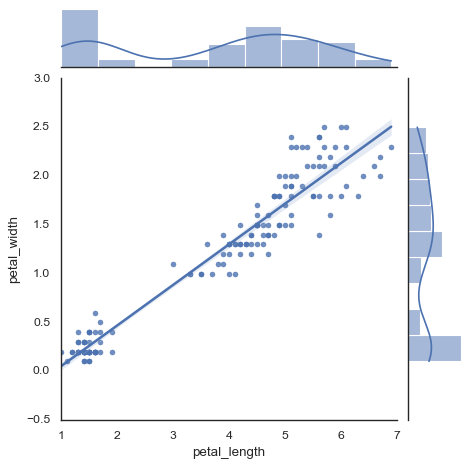

In [73]:
with sns.axes_style('white'):
    sns.jointplot("petal_length", "petal_width", data=iris, kind='reg')


Entraînez-vous en effectuant une régression linéaire
À vous de jouer !
Pour vous entraîner, réalisez cet exercice étape par étape. Une fois terminé, vous pouvez comparer votre travail avec les pistes que je vous propose.

Contexte
Dans cette activité, vous allez faire appel à tout ce que vous avez étudié dans la deuxième partie du cours. Nous allons nous intéresser à la relation entre la distance qui nous sépare d'une galaxie, et la vitesse à laquelle elle s'éloigne de nous. Cette relation fut découverte pour la première fois par Erwin Hubble en 1929. Son article est disponible ici. 

Pour cela, vous aurez besoin du fichier hubble.csv.

Votre tâche consiste à charger le contenu de ce fichier grâce à Pandas, regarder les données qu'elle contient, et effectuer une régression linéaire entre les deux variables distance et velocity. 

Pour faire cette régression, vous devez utiliser la bibliothèque scikit-learn. La page de documentation la plus approprié pour cette activité est ici. Il y a aussi un exemple complet d'une regression linéaire ici.

Vous devrez aussi visualiser vos résultats, avec des graphiques de qualité (n'hésitez pas à relire le chapitre sur matplotlib). Ces graphiques doivent inclure à la fois les points de données, et la courbe obtenue grâce à la régression linéaire.

Consigne
N'oubliez pas de fournir les coordonnées de la courbe de régression.

Votre graphique devrait être présentable :  titres, labels, taille de police appropriée, et qui représente les données et la courbe.

Vérifiez votre travail
Alors, vous êtes allé au bout ? Suivez le guide pour vérifier votre travail !

Voici un exemple pour vous permettre de vérifier votre travail !

Avec  Numpy  et  Matplotlib  , la librairie  Pandas  fait partie des librairies de base pour la data science en Python. Pandas fournit des structures de données puissantes et simples à utiliser, ainsi que les moyens d'opérer rapidement des opérations sur ces structures. Dans ce chapitre, nous verrons l'intérêt de la librairie Pandas, ainsi que les opérations basiques sur l'objet phare de cette librairie, le dataframe.

Mais commençons par un peu de réflexion !

Réfléchissons un peu
Imaginons que nous souhaitions représenter des animaux. Disons... des pandas par exemple !

Nous pouvons caractériser un panda par sa taille ; ou plutôt, par ses tailles : disons par exemple, la taille de ses pattes, la longueur moyenne des poils de sa fourrure, la taille de sa queue, et le diamètre de son ventre.

On peut représenter ce pandas par un tableau numpy :


In [74]:
import numpy as np
un_panda_numpy = np.array([100,5,20,80])
un_panda_numpy

array([100,   5,  20,  80])

ci, notre panda a des pattes de 100cm, des poils de 5cm en moyenne, une queue de 20cm et un ventre de 80cm de diamètre.

Et si je veux représenter plusieurs pandas, je crée une liste de np.array?

C'est une bonne idée. Il est effectivement possible de faire cela :



In [75]:
famille_panda = [
    np.array([100, 5  , 20, 80]), # maman panda
    np.array([50 , 2.5, 10, 40]), # bébé panda
    np.array([110, 6  , 22, 80]), # papa panda
]

Mais comme nous l'avons vu précédemment, nous pouvons faire mieux car notre liste de 3 pandas, c'est en fait un tableau multidimensionnel, que NumPy gère très bien !


In [76]:

famille_panda = [
    [100, 5  , 20, 80], # maman panda
    [50 , 2.5, 10, 40], # bébé panda
    [110, 6  , 22, 80], # papa panda
]
famille_panda_numpy = np.array(famille_panda)
famille_panda_numpy

array([[100. ,   5. ,  20. ,  80. ],
       [ 50. ,   2.5,  10. ,  40. ],
       [110. ,   6. ,  22. ,  80. ]])

Ici, nous avons créé une liste de pandas, c'est à dire une liste de listes ; des listes imbriquées en fait ! En langage Numpy, on dit que le rang de famille_panda_numpy est de 2, car nous avons 2 niveaux d'imbrication.

Quel avantage?

Par exemple, supposons que je veuille obtenir la taille des pattes (situé en position 0 dans chaque liste qui décrit un panda) du panda situé en position 2 dans ma liste (c'est-à-dire papa panda). Numpy offre la possibilité de le faire élégamment :


In [77]:

famille_panda_numpy[2, 0] # taille des pattes de papa panda, à la manière numpy

110.0

Et si je veux connaître les tailles des pattes de toute ma famille panda ?

Facile ! Il suffit de supprimer le 2 (qui correspondait au papa panda), et de le remplacer par le caractère:, signifiant que je veux TOUS les pandas !


In [78]:

famille_panda_numpy[:, 0]

array([100.,  50., 110.])

Voilà ! La taille des pattes de la maman est de 100cm, celle du bébé 50cm, et celle du papa 110cm.

C'est assez pratique certes, mais écrire  famille_panda_numpy[:, 0]  quand on veut connaître la taille des pattes des pandas, ce n'est pas très explicite. j'aimerais pouvoir spécifier quelque-part que ce  0  correspond à la taille des pattes !

Cela nous amène à la librairie Pandas !

La librairie Pandas
Tout est une histoire de tableau !
Au fait, la manière dont j'ai écrit la variablefamille_panda:



In [79]:
famille_panda = [
    [100, 5  , 20, 80],
    [50 , 2.5, 10, 40],
    [110, 6  , 22, 80],
]


ça ressemble un peu à un tableau avec des lignes et des colonnes non ? Vous ne trouvez pas que c'est très similaire à cela?

C'est parti, représentons nos pandas avec Pandas !


In [80]:
import pandas as pd
famille_panda_df = pd.DataFrame(famille_panda)
famille_panda_df

,0,1,2,3
0,100,5.0,20,80
1,50,2.5,10,40
2,110,6.0,22,80


L'objet qui permet de représenter des "tableaux" est l'objet DataFrame. Pour instancier un tel objet (et pour lui donner de la donnée), on lui transmet une liste de rang 2, c'est à dire une liste de listes.

Nous pouvons même faire mieux, en indiquant les noms de colonnes et les noms des lignes. Et encore mieux : la librairie Pandas se base en grande partie sur la librairie Numpy dans son fonctionnement interne. Comme pandas connaît intimement Numpy, on peut très bien transmettre à l'objet DataFrame de la donnée au format ndarray :


In [81]:
famille_panda_df = pd.DataFrame(famille_panda_numpy,
                                index = ['maman', 'bebe', 'papa'],
                                columns = ['pattes', 'poil', 'queue', 'ventre'])
famille_panda_df

,pattes,poil,queue,ventre
maman,100.0,5.0,20.0,80.0
bebe,50.0,2.5,10.0,40.0
papa,110.0,6.0,22.0,80.0


Le nom des lignes est appelé index. Un index peut être une chaîne de caractères (un label) ou un nombre entier. Quand aucun index n'est spécifié à la création du dataframe, il est initialisé par défaut avec une suite continue d'entiers commençant par 0.

Vous allez encore me demander quel est l'intérêt de cette librairie n'est-ce pas ?

En fait, l'objet DataFrame est très similaire à certains concepts que l'on trouve en dehors du cadre du langage Python. Il est similaire :

aux tables des bases de données relationnelles (type MySQL, PostgreSQL, etc.) que l'on manipule grâce au langage SQL

à l'objet dataframe sur lequel se base tout le langage R, langage destiné aux statisticiens et aux Data Analysts

Du coup, si vous connaissez déjà le langage SQL ou le langage R, vous aurez beaucoup de facilité à utiliser le DataFrame de Pandas !

Quelques fonctionnalités des DataFrames
Voici quelques petites fonctionnalités des Dataframes.

Tout d'abord, accédons à la colonne ventre de notre table. Il y a deux syntaxes possibles, qui renvoient exactement le même résultat :


In [82]:
famille_panda_df.ventre
famille_panda_df["ventre"]

maman    80.0
bebe     40.0
papa     80.0
Name: ventre, dtype: float64

L'objet que renvoie famille_panda_df["ventre"] est de type pandas.Series. Pour obtenir les valeurs de la colonne ventre au format numpy, il faut saisir famille_panda_df["ventre"].values

 Parcourrons maintenant tous les pandas un à un, grâce à la méthode iterrows qui renvoie (à chaque itération de la boucle for) un tuple dont le premier élément est l'index de la ligne, et le second le contenu de la ligne en question :


In [83]:
for ind_ligne, contenu_ligne in famille_panda_df.iterrows():
    print("Voici le panda %s :" % ind_ligne)
    print(contenu_ligne)
    print("--------------------")

Voici le panda maman :
pattes    100.0
poil        5.0
queue      20.0
ventre     80.0
Name: maman, dtype: float64
--------------------
Voici le panda bebe :
pattes    50.0
poil       2.5
queue     10.0
ventre    40.0
Name: bebe, dtype: float64
--------------------
Voici le panda papa :
pattes    110.0
poil        6.0
queue      22.0
ventre     80.0
Name: papa, dtype: float64
--------------------


Accédons maintenant au papa panda : d'abord par sa position (position 2), puis par son nom "papa". Le résultat retourné est exactement le même dans les 2 cas.


In [84]:

famille_panda_df.iloc[2] # Avec iloc(), indexation positionnelle


pattes    110.0
poil        6.0
queue      22.0
ventre     80.0
Name: papa, dtype: float64

In [85]:
famille_panda_df.loc["papa"] # Avec loc(), indexation par label

pattes    110.0
poil        6.0
queue      22.0
ventre     80.0
Name: papa, dtype: float64

Déterminons les pandas dont le diamètre du ventre est de 80cm :


In [86]:

famille_panda_df["ventre"] == 80

maman     True
bebe     False
papa      True
Name: ventre, dtype: bool

Ici, on teste chaque élément de la colonne "ventre" en demandant s'il est égal à 80. On obtient la réponse suivante : "maman" : True, "bebe" : False, "papa" : True.

Le résultat de cette opération est très pratique pour filtrer des lignes ! Par exemple, pour sélectionner uniquement les pandas dont le ventre est de 80cm, il suffit d'intégrer ce précédent résultat en tant que masque, comme ceci :


In [87]:
masque = famille_panda_df["ventre"] == 80
pandas_80 = famille_panda_df[masque]

# On écrit plus souvent cela de cette manière :
# pandas_80 = famille_panda_df[famille_panda_df["ventre"] == 80]

pandas_80

,pattes,poil,queue,ventre
maman,100.0,5.0,20.0,80.0
papa,110.0,6.0,22.0,80.0


Qu'est-ce qu'un masque ?

Lorsque vous mettez un masque sur votre visage, celui-ci cache certaines parties de votre tête, mais en laisse visible d'autres : vos yeux, votre nez et votre bouche. Ici, c'est un peu la même chose : comme nous souhaitons ne garder que certaines lignes du dataframe, et en cacher d'autres, nous appliquons un masque. Un masque est ici une liste de variables booléennes (TrueouFalse) dans laquelle chaque élément est associé à une ligne du dataframe. Si cet élément estTrue, cela signfie que nous souhaitons garder la ligne en question. Si nous souhaitons ne pas garder la ligne, cet élément estFalse.

Pour inverser le masque, il suffit d'utiliser l'opérateur~, et nous sélectionnons les pandas qui n'ont pas un ventre de 80cm :


In [88]:
famille_panda_df[~masque]

,pattes,poil,queue,ventre
bebe,50.0,2.5,10.0,40.0


Maintenant, ajoutons des lignes à notre dataframe. Il y a plusieurs méthodes pour cela, mais voyons ici la plus simple : assemblons ensemble deux dataframes.


In [89]:
quelques_pandas = pd.DataFrame([[105,4,19,80],[100,5,20,80]],      # deux nouveaux pandas
                               columns = famille_panda_df.columns) 
                               # même colonnes que famille_panda_df
tous_les_pandas = famille_panda_df.append(quelques_pandas)
tous_les_pandas

,pattes,poil,queue,ventre
maman,100.0,5.0,20.0,80.0
bebe,50.0,2.5,10.0,40.0
papa,110.0,6.0,22.0,80.0
0,105.0,4.0,19.0,80.0
1,100.0,5.0,20.0,80.0


Dans le dataframe tous_les_pandas, il y a des doublons. En effet, le premier panda (maman) et le dernier panda (dont l'index est 1) ont exactement les mêmes mesures. Si nous souhaitions dédoublonner, nous ferions ceci :


In [90]:

tous_les_pandas.drop_duplicates()

,pattes,poil,queue,ventre
maman,100.0,5.0,20.0,80.0
bebe,50.0,2.5,10.0,40.0
papa,110.0,6.0,22.0,80.0
0,105.0,4.0,19.0,80.0


Le résultat de cette ligne ne modifie pas le dataframe  tous_les_pandas  . Il ne fait que renvoyer un autre dataframe. Dans l'état actuel, ce nouveau dataframe est juste affiché et n'est pas enregistré en mémoire : il sera donc perdu. Pour le garder, on peut soit l'enregistrer dans une nouvelle variable, ...


In [91]:

pandas_uniques = tous_les_pandas.drop_duplicates()


 ... soit remplacer la variable tous_les_pandas par ce nouveau dataframe dédoublonné :



In [92]:
tous_les_pandas = tous_les_pandas.drop_duplicates()

Allez, encore un petit effort ! Voici quelques autres fonctionnalités en vrac, que nous utiliserons dans le projet :


In [93]:

# accéder aux noms des colonnes
famille_panda_df.columns


Index(['pattes', 'poil', 'queue', 'ventre'], dtype='object')

In [94]:
famille_panda_df["sexe"] = ["f", "f", "m"] 
# la maman et le bébé sont des femelles, le papa est un mâle


In [95]:
# obtenir le nombre de lignes
len(famille_panda_df)

3

Lire un fichier CSV avec Pandas
Un fichier CSV (comma separated values), c'est un fichier permettant de représenter des données sous forme de tableau. D'ailleurs, si vous utilisez un logiciel de type tableur, il y a fort à parier qu'il puisse lire et exporter au format CSV !

Vous me voyez venir ? La librairie Pandas est justement spécialisée dans la manipulation de tableaux ! Lire un fichier CSV avec Pandas est donc un jeu d'enfant : il ne suffit que d'une ligne pour créer un dataframe à partir d'un CSV :


Ici, donner data.csv en premier argument à read_csv suppose que le fichier data.csv se trouve dans le répertoire courant. Le répertoire courant, c'est le répertoire (le dossier) à partir duquel vous avez lancé votre notebook (ou Python le cas échéant). Si vous ne le connaissez pas, vous pouvez saisir ceci :



In [96]:
import os
os.getcwd()
 

'C:\\Users\\Administrateur'

Pour lire un fichier qui ne se trouve pas dans le répertoire courrant, utilisez une syntaxe de cette forme :  "/home/user1/Bureau/data.csv"  . Pour plus de précisions, consultez cette page ou la section "Avant de commencer" de ce chapitre.

C'est fait ! La variabledata contient maintenant un dataframe contenant les données du fichier csv. Petite particularité ici : dans notre fichier CSV, les valeurs sont séparées par le caractère;. Par défaut, pd.read_csv attend des valeurs séparées par une virgule. Nous sommes donc obligés de spécifier sep=";". Pour en savoir plus sur  read_csv , faites un petit tour sur la doc ;) ! Pour avoir un exemple d'utilisation, visitez le haut de ce chapitre.

Maintenant que vous savez comment créer un DataFrame, intéressons à d'autres opérations usuelles sur les données. Pour ce faire, je vous propose d'utiliser un DataSet disponible dans la librairie Seaborn ! Le dataset en question comprend des données sur les survivants du naufrage du Titanic !

Dans ce chapitre, nous allons suivre une session de travail "typique".


In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

La première chose à faire est de jeter un rapide coup d'oeil à nos données.


In [98]:

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


La fonction  tail  est le pendant de la fonction  head  . Elle affiche les derniers éléments du DataFrame.

Jetons un coup d'oeil à tous les âges. La fonction unique renvoie les valeurs uniques présentes dans une structure de données Pandas.



In [99]:
titanic.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Remarquez la présence de valeurs inférieures à 1!

Mentionnons aussi l'excellente fonction  describe . Elle donne des statistiques diverses (moyenne, maximum, minimum, etc.) sur les données contenues dans chaque colonne:



In [100]:
titanic.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


L'argument include="all" sert à inclure les colonnes non-numérique dans l'analyse. Cette fonction nous fournit pleins de données très utiles sur la répartition de nos données (minimum, maximum, moyenne, etc.)

Données manquantes
 Vous aurez remarqué, dans la sortie de la fonction  describe  , des valeurs  NaN  . C'est une valeur définie pour représenter quelque chose qui n'est pas un nombre (Not a Number) alors que son type l'exige. Par exemple, on obtient NaN si on demande à Pandas de calculer la moyenne d'une colonne de texte. 

Plus généralement, le résultat de toute opération impliquant une NaN est à son tour un NaN. Par exemple, si une de vos colonnes contient une NaN (parce que la vraie valeur n'est pas connue), le résultat de toutes les opérations arithmétiques qui impliquent cette valeur (comme la moyenne de la colonne) sera NaN, sauf si vous prenez soin de ne pas prendre en compte cette valeur (Pandas le fait, par exemple sur la colonne age, dans notre exemple).

Le traitement à des valeurs manquantes est abordé dans un autre cours. Nous allons simplement voir deux opérations à appliquer aux NaN.

La première consiste à remplacer les NaN par d'autres valeurs. Cette opération s'effectue grâce à la fonction  fillna  .  Regardons son application sur la colonne  age  .



In [101]:
titanic.age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [102]:
titanic.fillna(value={"age": 0}).age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     0.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

Renvoie un DataFrame où toutes les  NaN  dans la colonne  age  on été remplacés par 0.

Nous aurions aussi pu remplir les NaN par les valeurs précédentes:



In [103]:
titanic.fillna(method="pad").age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    35.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

Enfin, la fonction  dropna  permet de supprimer les axes (colonnes ou lignes) qui contiennent des NaN. Par défaut, elle supprime les lignes concernées:



In [104]:
titanic.dropna().head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False


Mais on peut aussi lui demander de supprimer carrément les colonnes!



In [105]:
titanic.dropna(axis="columns").head()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


Renommer une colonne
La fonction rename permet de renommer les colonnes ou les lignes d'un DataFrame. Elle s'utilise de deux façon.



In [106]:
titanic.rename(columns={"sex":"sexe"})

,survived,pclass,sexe,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Renomme la colonne "sex" en "sexe". Tandis que:


In [107]:

f = lambda x: x+1
titanic.rename(index=f)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
5,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
890,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


applique la fonction  f  à tous les index. 

Supprimer des axes
La fonction  drop  permet de supprimer des axes (colonnes ou lignes) d'un DataFrame. Son utilisation est plutôt simple.



In [108]:
titanic.drop(0)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Supprimera la ligne dont l'index est égal à 0.



In [109]:
titanic.drop(columns=["age"])


,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Supprime la colonne "age"

Bon nombre de fonctions Pandas, telles que  dropna  ,  fillna  ,  drop  , etc acceptent un argument  inplace  .  Si la valeur de cet argument est  True  , le DataFrame donné en argument est modifié. Sinon, une copie du DataFrame est retournée par la fonction.

Tableaux croisés dynamiques
Avant de vous lancer dans l'algèbre relationnelle, mentionnons les tableaux croisés dynamiques. Vous êtes peut-être familier avec ce concept, par exemple parce que vous les avez utilisé dans des logiciels tableurs.

Ces tableaux, encore appelés tables de pivots (ou pivot table), permettent de synthétiser les données contenues dans un DataFrame. Essayons de voir cela par l'exemple.

Pour voir la répartition des survivants en fonction de leurs sexes et de leur type de billet, nous n'avons besoin que d'une seule ligne:



In [110]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Le résultat est parfaitement compréhensible:

Par défaut, la fonction pivot_table groupe les données en fonction des critères que nous spécifions, et agrège les résultats en moyenne. Nous pouvons spécifier d'autres fonctions. Par exemple, si nous voulons savoir quelle est le nombre total de survivants dans chaque cas, nous utiliserons la fonction  sum  .


In [111]:

titanic.pivot_table('survived', index='sex', columns='class', aggfunc="sum")

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


Bien sûr, cela ne fonctionne que parce que les auteurs du dataset ont judicieusement choisi de représenter la survie avec des 0 et des 1 ! 

La fonction pivot_table est très puissante, et permet même de faire des agrégations à plusieurs niveaux. Par exemple, nous pouvons voir l'âge des survivants comme une dimension supplémentaires. Le nombre exact d'années nous intéressant peu, nous regrouperons les âge en deux catégories, grâce à la fonction  cut  .


In [112]:

titanic.dropna(inplace=True)
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.500000
       (18, 80]  0.968254  0.875000  0.666667
male   (0, 18]   0.800000  1.000000  1.000000
       (18, 80]  0.397436  0.333333  0.250000

Le résultat est un DataFrame multi-indexé:

Remarquez les deux niveaux d'indexation à gauche.

Nous n'allons pas parler en détail des DataFrame à indexation multiple. Sachez seulement que Pandas est capable de les gérer, et que les fonctions pandas sont capables, en utilisant les bons arguments, de travailler avec ces DataFrames. 

Voilà. J'espère que vous avez une meilleure idée des capacités de Pandas. Dans le chapitre suivant, vous allez voir comment effectuer des opérations d'algèbre linéaires (comme dans le langage SQL) sur les DataFrames.

Effectuez les opérations d'algèbre relationnelle sur les DataFrames
Le cours écrit donne bien plus de détails que la vidéo (notamment une mise en garde concernant les jointures). N'hésitez pas à le consulter.

Dans ce chapitre, nous continuons à investiguer l'objet dataframe. Plus précisément, nous allons voir comment effectuer les opérations de base de l'algèbre relationnelle.

L'algèbre relationnelle
L'algèbre relationnelle est une théorie permettant de manipuler des données disposées sous forme de tableau ; et ça tombe bien : un dataframe, c'est justement un tableau !

Dans ce domaine, un tableau, on appelle cela une relation.

Plus précisément, l'algèbre relationnelle définit des opérations sur ces tableaux. Elles sont regroupables en 5 grandes catégories :

La projection et la restriction

Les opérations ensemblistes (union, différence, intersection)

Le produit cartésien

Les jointures

L'agrégation

A priori, pas besoin de les connaître à l'avance, les exemples de ce chapitre sont assez explicites. Cependant pour mieux comprendre, il vous sera peut-être utile de jeter un rapide coup d’œil à la jointure et à l'agrégation.

Si vous avez déjà pratiqué le SQL, alors je vous conseille de lire en parallèle de ce chapitre cette page de la documentation officielle, qui donne la "traduction" du SQL vers pandas ;) : https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

Les structures de données de Pandas
La librairie Pandas fournit deux structures de données fondamentales, la "Series" et le "DataFrame". On peut voir ces structures comme une généralisation des tableaux et des matrices de Numpy. La différence fondamentale entre ces structures et les versions de Numpy est que les objets Pandas possèdent des indices explicites. Là où on ne pouvait se référer à un élément d'un tableau Numpy que par sa position dans le tableau, chaque élément d'une Series ou d'un DataFrame peut avoir un indice explicitement désigné par l'utilisateur.

L'indice explicite est optionnel. On peut très bien utiliser une Series par exemple comme on utiliserait un tableau Numpy, en se contentant des indices générés automatiquement en fonction de la position de chaque élément.

Commençons par un rappel pour voir comment créer ces structures et nous en servir pour quelques opérations de base.



In [113]:
import numpy as np
import pandas as pd

# On peut créer une Series à partir d'une list
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print("data ressemble à un tableau Numpy: ", data)

# On peut spécifier des indices à la main
data = pd.Series([0.25, 0.5, 0.75, 1.0],
         index=['a', 'b', 'c', 'd'])
print("data ressemble à un dict en Python: ", data)
print(data['b'])

# On peut même créer une Serie directement à partir d'une dict
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
area_dict = {'California': 423967, 
             'Texas': 695662,
             'New York': 141297, 
             'Florida': 170312,
             'Illinois': 149995}
population = pd.Series(population_dict)
area = pd.Series(area_dict)
print(population)
# Que pensez vous de cette ligne?
print(population['California':'Florida'])

data ressemble à un tableau Numpy:  0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64
data ressemble à un dict en Python:  a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
0.5
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64


De la même façon que les opérations sur les tableaux Numpy sont plus rapides que celles sur les list en Python, les opérations sur les Series sont plus rapides que celles sur les dict.

Les DataFrame permettent de combiner plusieurs Series en colonnes, un peu comme dans un tableau SQL. Construire un DataFrame est chose aisée :



In [114]:
# A partir d'une Series
df = pd.DataFrame(population, columns=['population'])
print(df)

# A partir d'une list de dict
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
df = pd.DataFrame(data)
print(df)

# A partir de plusieurs Series
df = pd.DataFrame({'population': population,
              'area': area})
print(df)

# A partir d'un tableau Numpy de dimension 2
df = pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])
print(df)

# Une fonction pour générer facilement des DataFrame. 
# Elle nous sera utile dans la suite de ce chapitre.
def make_df(cols, ind):
    """Crée rapidement des DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# exemple
make_df('ABC', range(3))

            population
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
   a  b
0  0  0
1  1  2
2  2  4
            population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995
        foo       bar
a  0.008175  0.999923
b  0.130304  0.201192
c  0.609050  0.985925


,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


La projection et la restriction
Commençons par 2 opérations de l'algèbre relationnelle : la projection et la restriction. Elles sont très simples : la première est une sélection de certaines colonnes, et la seconde une sélection de certaines lignes.

On peut référer aux éléments des objets Pandas en utilisant soit leurs index implicites (de la même façon que les tableaux Numpy) soit les index explicites (comme dans les dict). Pour éviter toute confusion, il est conseillé d'utiliser les attributs  loc  (qui référence par l'index) et  iloc  (qui référence par la position) de chaque objet.



In [115]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])

print(data)

# On peut désigner un élément d'une Series par son index
print(data.loc['b'])

# Ou bien par sa position
print(data.iloc[1])

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
0.5
0.5


La différence entre les deux devrait être claire après avoir exécuté ces lignes. Effectuer ces mêmes opérations sur les Dataframe se fait de manière analogue :


In [116]:

data = pd.DataFrame({'area':area, 'pop':population})
print(data)

data.loc[:'Illinois', :'pop']

              area       pop
California  423967  38332521
Texas       695662  26448193
New York    141297  19651127
Florida     170312  19552860
Illinois    149995  12882135


,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


L'union grâce à pd.concat
L'une des opérations les plus simples en algèbre relationnelle est l'union de données. Unir deux tableaux, c'est simplement créer un troisième tableau qui contient toutes les lignes du premier et toutes les lignes du second.

Dans notre cas, nous allons nous intéresser à l'union de Series ou de DataFrame. Cette opération consiste en l'assemblage de plusieurs structures pour en créer une nouvelle. Avec Pandas, cette opération s'accomplit grâce à la fonction  pd.concat.



In [117]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

Pour une Series, cela paraît facile. Mais pour un DataFrame ?


In [118]:

df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
pd.concat([df1, df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


Étudiez bien ce morceau de code. Fait-il ce que vous en attendiez ?

Par défaut,  pd.concat  assemble ses arguments "verticalement". Pour changer ce comportement, on peut utiliser l'argument  axis.

Problèmes des index avec l'union
La concaténation préserve les index ! Par exemple, si les deux DataFrames donnés en arguments ont des index en commun, le résultat final aura des index dupliqués.

C'est souvent un problème. Pour y pallier, on peut utiliser les index hiérarchiques.



In [119]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # Rend les index identiques
# Nous avons alors des index dupliqués
print(pd.concat([x, y]))

# Nous pouvons spécifier des index hiérarchiques
hdf = pd.concat([x, y], keys=['x', 'y'])
print(hdf)

    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


Comment utiliser les index hiérarchiques ?

Pour accéder à un élément d'un objet Pandas avec un index hiérarchique, il suffit de spécifier plusieurs index. Dans notre exemple, essayez par exemple de voir le résultat de   hdf.loc[('x', 1),]  .

La fonction  pd.concat  est très puissante. Je vous invite à consulter la documentation de Pandas, en particulier cette page pour en apprendre plus.

La jointure
Une autre fonction très utile pour manipuler les Dataframe est  pd.merge  . Elle effectue une jointure.

Une jointure, c'est assembler les informations d'un tableau A avec celles d'un autre tableau B selon un  critère choisi. Ce critère s'appelle la condition de jointure. Cette condition est composée de une ou plusieurs colonnes communes à A et B qui effectuent une correspondance entre les 2 tableaux.

Un petit exemple. Imaginons que nous disposons de deux Dataframes :

df1  contenant une liste d'employés et le nom des départements dans lequel ils travaillent,

df2  contenant la même liste d'employés et leurs dates d'entrée dans l'entreprise.

La fonction  pd.merge  nous permet de transformer ces deux Dataframes en un seul, contenant les deux informations.

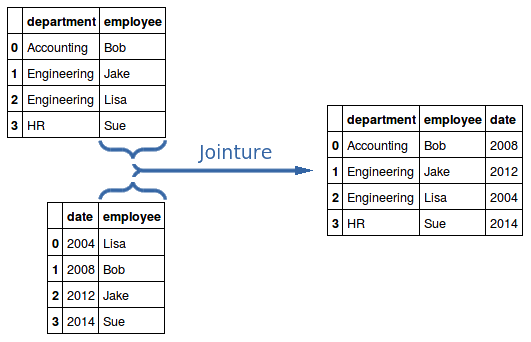

In [120]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'department': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'date': [2004, 2008, 2012, 2014]})
df3 = pd.merge(df1, df2)

In [121]:
df3

,employee,department,date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


En effectuant une jointure, il est préférable de toujours faire attention à la cardinalité de la relation entre A et B afin d'évider certaines erreurs. Un exemple d'une telle erreur est donnée dans la section "Pourquoi les clés sont-elles si importantes ?" de ce chapitre.

Il y a 3 cardinalités différentes :

Un-à-un (one-to-one) : lorsque qu'une ligne quelconque du tableau A correspond à une unique ligne du tableau B, et qu'une ligne de B correspond à une unique ligne du tableau A.

Un-à-plusieurs (one-to-many) : quand une ligne quelconque de A correspond à une ligne de B, mais qu'une ligne de B peut correspondre à plusieurs lignes de A.

Plusieurs-à-plusieurs (many-to-many) : quand une ligne de A peut correspondre à plusieurs lignes de B, et qu'une ligne de B peut correspondre à plusieurs lignes de A.

Un petit exemple à base de pommes ? Faites un tour par ici !

La fonction  pd.merge  ne fait pas la différence entre ces 3 cardinalités : elle s'utilise exactement de la même manière dans les 3 cas.

 Une petite précision destinée à ceux qui ont suivi le cours Initiez-vous à l'algèbre relationnelle avec le langage SQL.

Il a été dit dans l'un des chapitres qu'en cas de cardinalité plusieurs-à-plusieurs, il est préférable d'utiliser une table d'association.

Si on le fait, on "casse" le plusieurs-à-plusieurs, et on se retrouve alors avec 2 jointures de type un-à-plusieurs grâce à la table d'association. Les jointures sur des cardinalités un-à-plusieurs (et aussi un-à-un) sont celles auxquelles vous avez été habituées dans le cours sur l'algèbre relationnelle. Elles devraient donc ne pas vous causer de soucis !

Mais si on ne le fait pas, alors on brise le principe énoncé dans ce chapitre de mise en garde, qui dit "En général, on effectue une jointure d'une clé étrangère d'une table A vers une clé candidate d'une table B" . En effet, on se retrouve à faire une jointure sur une cardinalité plusieurs-à-plusieurs ; et dans ce cas, on ne joint sur aucune clé candidate ! La jointure plusieurs-à-plusieurs vous paraîtra donc un peu plus bizarre, mais vous devriez vous y faire rapidement ;)

 

Pour bien comprendre, déterminez dans le code qui suit les clés primaires et étrangères de chacun des dataframes  df1  à  df5  .

Cardinalité un-à-un
L'exemple que nous avons pris tout à l'heure correspond à une cardinalité un-à-un. En effet, un employé ne travaille que dans un seul département, et n'a qu'une seule année d'embauche.



In [122]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'department': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'date': [2004, 2008, 2012, 2014]})

df3 = pd.merge(df1, df2)
df3

,employee,department,date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


Cardinalité un-à-plusieurs (ou plusieurs-à-un)
Maintenant nous voulons ajouter une autre colonne. Chaque département a un chef. Cette information est contenue dans un Dataframe. Nous voulons ajouter une colonne à  df3  pour y ajouter le chef de chaque employé.

Ici, c'est une cardinalité un-à-plusieurs. En effet, df3  représente des employés, et  df4  représente des chefs. Un employé n'a qu'un seul chef, mais un chef peut diriger plusieurs empoyés.



In [123]:
df4 = pd.DataFrame({'department': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
pd.merge(df3, df4)

,employee,department,date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


Remarquez que Guido apparaît plusieurs fois dans le résultat.

Cardinalité plusieurs-à-plusieurs
Pour continuer avec notre exemple, supposons que nous disposions d'un autre Dataframe contenant les compétences nécessaires pour travailler dans chaque département :



In [124]:
df5 = pd.DataFrame({'department': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'competence': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})

In [125]:
df5

,department,competence
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


Maintenant, nous souhaitons associer à chaque employé les compétences qu'il doit posséder pour travailler dans son département. Ici, c'est une cardinalité plusieurs-à-plusieurs car un employé a besoin de plusieurs compétences, et une compétence peut être partagée par plusieurs employés.



In [126]:
pd.merge(df1, df5)

,employee,department,competence
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


La jointure externe
Reprenons df1  et ajoutons-y Lea, employée dans le département Engineering. Appelons ce nouveau dataframe  df6  . Cependant, nous n'ajoutons pas Lea à  df2  :



In [127]:
df6 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue', 'Lea'],
                    'department': ['Accounting', 'Engineering', 'Engineering', 'HR', 'Engineering']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'date': [2004, 2008, 2012, 2014]})

Si on écrit cette jointure...



In [128]:
pd.merge(df6, df2)

,employee,department,date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


Lea a disparu !

Effectivement. Comme Lea est présente dans df6 mais pas dans df2, elle n’apparaît pas dans le résultat de la jointure... Pour spécifier que l'on veut garder tous les éléments de dataframe de gauche (ici df6), il faut alors écrire la ligne suivante :



In [129]:
pd.merge(df6, df2, how="left")

,employee,department,date
0,Bob,Accounting,2008.0
1,Jake,Engineering,2012.0
2,Lisa,Engineering,2004.0
3,Sue,HR,2014.0
4,Lea,Engineering,NaN


Ainsi, Lea est présente dans la table finale ! Bien entendu, pour garder toutes les lignes de la table de droite (df2), on écrit  how="right"  , et pour garder toutes les lignes à la fois à gauche et à droite, on écrit  how="outer"  . On appelle ces jointures respectivement : jointure externe à gauche, jointure externe à droite et jointure externe totale. Si ce n'est pas très clair, faites un petit tour dans la section "Jointure externe" de ce chapitre.

Le produit cartésien
Nous pouvons utiliser la jointure pour réaliser une autre opération d'algèbre relationnelle, le produit cartésien.



In [130]:
# Nous ajoutons une nouvelle colonne à df1 et df2, qui contient toujours
# la même valeur, ici 0.
df1['key'] = 0
df2['key'] = 0

# La jointure plusieurs-à-plusieurs
produit_cartesien = pd.merge(df1, df2, on='key')

# Effaçons la colonne key qui n'est plus utile
produit_cartesien.drop('key',1, inplace=True)

Il est possible de condenser ces 4 lignes en une seule !



In [131]:
pd.merge(df1.assign(key=0), df2.assign(key=0), on='key').drop('key', axis=1)

,employee_x,department,employee_y,date
0,Bob,Accounting,Lisa,2004
1,Bob,Accounting,Bob,2008
2,Bob,Accounting,Jake,2012
3,Bob,Accounting,Sue,2014
4,Jake,Engineering,Lisa,2004
5,Jake,Engineering,Bob,2008
6,Jake,Engineering,Jake,2012
7,Jake,Engineering,Sue,2014
8,Lisa,Engineering,Lisa,2004
9,Lisa,Engineering,Bob,2008


Avec ce que vous avez vu sur la jointure plusieurs-à-plusieurs, comprenez-vous ce qui se passe ici ?

Le produit cartésien est composé de toutes les associations possibles entre les lignes de df1 et celles de df2. Ici, avec nos données, le produit cartésien n'a cependant pas beaucoup de sens...

L'agrégation
Passons maintenant à l'agrégation !

Comme les tableaux Numpy, nous pouvons facilement effectuer des opérations sur l'ensemble des éléments d'une Series ou un Dataframe, comme par exemple  sum  ou  mean  :



In [132]:
rng = np.random.RandomState(42)

# Une Series avec cinq nombres aléatoires
ser = pd.Series(rng.rand(5))
print(ser.sum())
print(ser.mean())


2.811925491708157
0.5623850983416314


Pour un Dataframe, ces calculs sont aussi possibles, et ils sont réalisés par colonne :



In [133]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
                   
# Par colonne
print(df.mean())

# Par ligne
print(df.mean(axis='columns'))

A    0.477888
B    0.443420
dtype: float64
0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64


Ces fonctions sont des fonctions d'agrégation.

Pandas nous permet d'accomplir une agrégation par groupe, semblable à ce qu'on peut obtenir en utilisant le mot clé  GROUP BY en SQL.



In [134]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': [10,11,10,9,10,10]})                  
print(df)

  key  data1  data2
0   A      0     10
1   B      1     11
2   C      2     10
3   A      3      9
4   B      4     10
5   C      5     10


Dans Pandas, cette opération se fait en deux étapes. Nous allons d'abord créer un objet de type  DataFrameGroupBy  , que nous appelons  gb  :



In [135]:
gb = df.groupby('key')


La (les) colonne(s) données dans groupby s'appelle(nt) l' (les) attribut(s) de partitionnement.

Sur cet objet gb, on peut ensuite appliquer les fonctions d'agrégation :


In [136]:

print(gb.sum())
print(gb.mean())

     data1  data2
key              
A        3     19
B        5     21
C        7     20
     data1  data2
key              
A      1.5    9.5
B      2.5   10.5
C      3.5   10.0


Si on veut par exemple calculer la somme des colonnes  data1  et  data2, et calculer la moyenne de  data2  uniquement, sachez qu'il est possible de sélectionner les colonnes nécessaires sur notre objet  gb  :



In [137]:
s = gb['data1','data2'].sum()
m = gb['data2',].mean()

groupped = pd.concat([s,m], axis=1)
groupped.columns = ["data1_somme","data2_somme","data2_moyenne"]


<ipython-input-137-121d820de931>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  s = gb['data1','data2'].sum()


Si vous connaissez le SQL, la requête équivalente est :

SELECT sum(data1) as data1_somme, sum(data2) as data2_somme, mean(data2) as data2_moyenne FROM df GROUP BY 'key';
Et voilà !

Comme pour les librairies précédentes, nous n'avons que frôlé toutes les possibilités offertes par Pandas. Je vous encourage vivement à consulter la documentation de cette librairie pour en apprendre plus. Pour aller plus loin, reportez-vous à cette ressource.

Entraînez-vous en générant des cartes de vœux avec Pandas
À vous de jouer !
Pour vous entraîner, réalisez cet exercice étape par étape. Une fois terminé, vous pouvez comparer votre travail avec les pistes que je vous propose.

Contexte
Vous avez une idée de start-up ! Vous souhaitez vendre des cartes de vœux pour les anniversaires... Ca parait simple, mais attention, il y a un twist ! Vous voulez faire un type de cartes de vœux pour le jour de la semaine de naissance du destinataire. Vous aurez ainsi 7 types de cartes différents.

Vous aimeriez prévoir la quantité de cartes à créer. Malheureusement, vous ne savez pas quelle quantité commander pour chaque jour. Mais vous avez accès aux données de naissance aux États-Unis dans ce fichier (eh oui, vous partez directement à l'international !)

Pour mieux comprendre quelles cartes créer, vous allez donc étudier les jours de naissance des habitants des états-unis.

Cette tâche implique un peu de nettoyage de données, et un peu d’algèbre linéaire. Vous aurez certainement besoin d'un peu de traitement avec la fonction  to_datetime  pour transformer les données en objets  datetime  (et un peu de connaissance en Python pour comprendre ce que c'est).

Consigne
Vous allez livrer un graphique avec trois courbes qui représentent le nombre de naissances pour chaque jour de la semaine pour les décennies 1960, 1970 et 1980.

Cette tâche implique un peu de nettoyage de données, et un peu d’algèbre linéaire. Vous aurez certainement besoin d'un peu de traitement avec la fonction  to_datetime  pour transformer les données en objets  datetime  (et un peu de connaissance en Python pour comprendre ce que c'est). Pour cet exercice, faites attention à ces points :

Nettoyage de la colonne births.

Conversion des colonnes day, month et year en datatime.

Conversion en jour de semaine.

L'agrégation doit être faite grâce à librairies Pandas.

In [145]:
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [139]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
# Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
# Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [147]:
f1=r"C:\Users\Administrateur\Downloads\data-CDCbirths-master\data-CDCbirths-master\births.csv"

In [149]:
births=pd.read_csv(f1)

In [150]:
births.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [151]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [152]:
births['decade'] = 10* (births['year'] // 10)

In [153]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


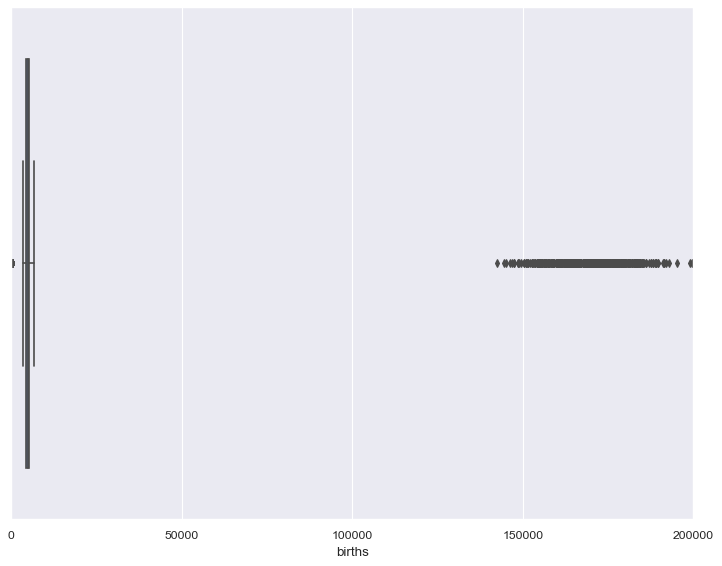

In [155]:
fig = plt.figure(figsize =(11,8))
fig = sns.boxplot(births.births)

c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


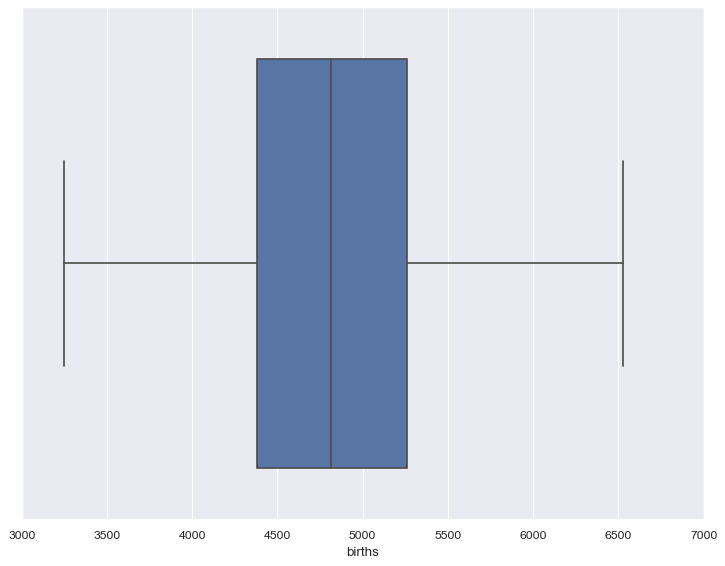

In [156]:
births = births.query('(births> 1000) & (births < 100000)')
fig = plt.figure(figsize =(11,8))
fig = sns.boxplot(births.births)

In [157]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14610 non-null  int64  
 1   month   14610 non-null  int64  
 2   day     14610 non-null  float64
 3   gender  14610 non-null  object 
 4   births  14610 non-null  int64  
 5   decade  14610 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 741.9+ KB


Days, months and years must be integer

In [158]:
for field in ["day", "month", "year"]:
    births[field] = births[field].astype(int)

In [159]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    14610 non-null  int32 
 1   month   14610 non-null  int32 
 2   day     14610 non-null  int32 
 3   gender  14610 non-null  object
 4   births  14610 non-null  int64 
 5   decade  14610 non-null  int64 
dtypes: int32(3), int64(2), object(1)
memory usage: 570.7+ KB


Extracting day of the week. Always use built-in libraries to work with date

In [160]:
#create a datetime index from the year, month, day
births.index = pd.to_datetime(10000*births.year+100*births.month+births.day, format ='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

In [161]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


And finally, number of births per day

<ipython-input-163-897740a8c946>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Tue', 'Fri', 'Sat', 'Sun'])


Text(0, 0.5, 'Births per day')

<Figure size 880x640 with 0 Axes>

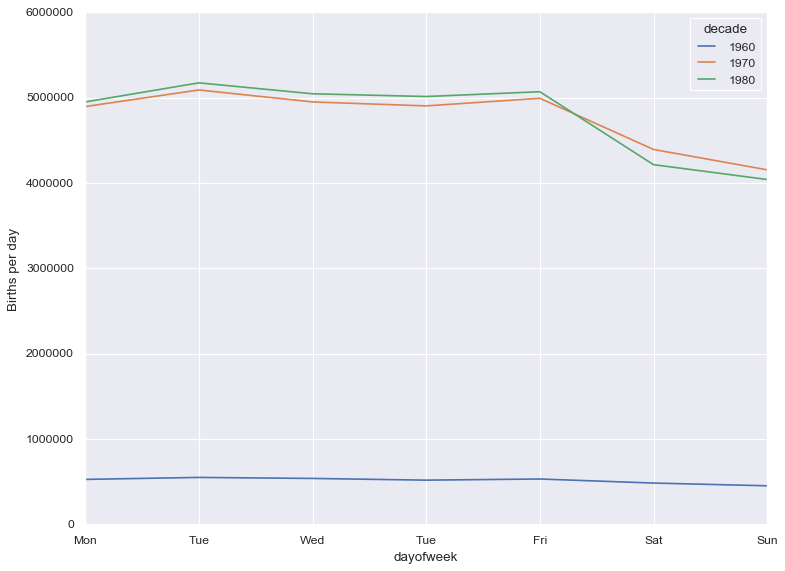

In [163]:
fig = plt.figure(figsize=(11,8))
births_per_day = births.pivot_table('births', index='dayofweek',columns='decade', aggfunc='sum')
births_per_day.plot(figsize=(11,8))
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Tue', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Births per day')

The low number of births in the 1960s is most likely due to missing data in the dataset. We can'tdo anything about this, but it probably makes more sense to have a look at the average number of births: 

<ipython-input-164-8feaa0079c14>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Tue', 'Fri', 'Sat', 'Sun'])


Text(0, 0.5, 'Births per day')

<Figure size 880x640 with 0 Axes>

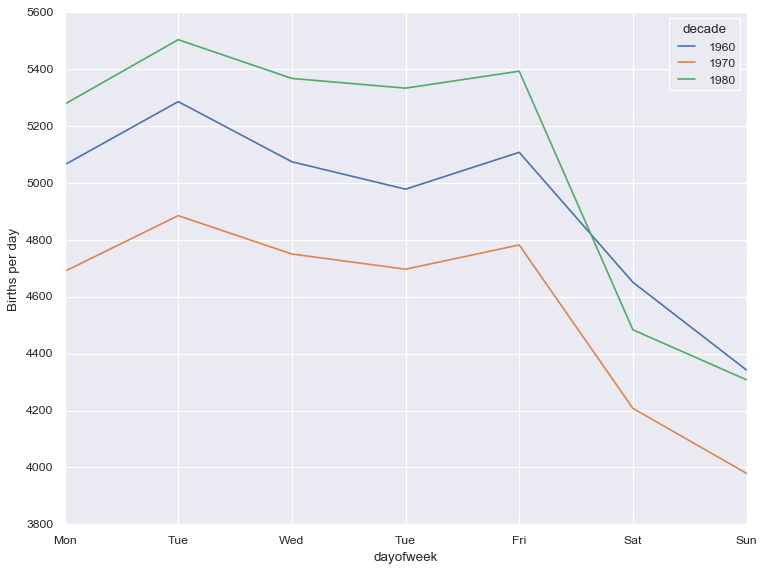

In [164]:
fig=plt.figure(figsize=(11,8))
births_per_day = births.pivot_table('births', index='dayofweek', columns='decade', aggfunc= 'mean')
births_per_day.plot(figsize=(11,8))
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Tue', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Births per day')

In [165]:
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [166]:
request.urlretrieve("https://s3-eu-west-1.amazonaws.com/static.oc-static.com/")

HTTPError: HTTP Error 403: Forbidden